# **Teoría de comunicación y procesamiento de señales**

# **Lab- proyecto #2**

**Elaborado por: Diana Cerdas Vargas y Sharon Vásquez Díaz**

**Profesor:**
              **Felipe Meza**

# Actividad #1: Sistema básico AM de tipo DSC-SC

Construir un sistema básico AM de tipo DSC-SC, incluyendo la etapa de modulación y demodulación, puede asumir condiciones óptimas, esto es no ruido o pérdidas o modificaciones en frecuencia o fase.
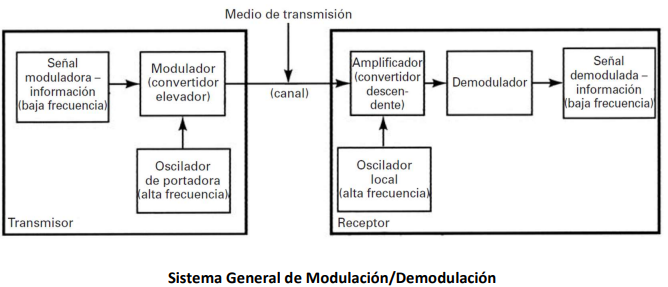

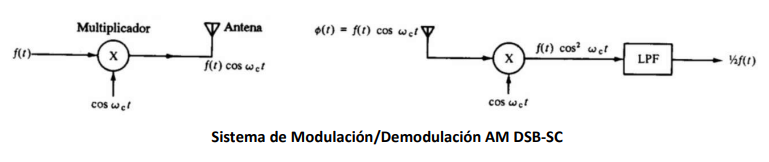


Algunas consideraciones:
1. Se recomienda crear una función para la modulación y otra para la demodulación.
2. Utilice sincronización coherente.
3. Puede asumir un canal óptimo sin pérdidas entre ambos bloques.
4. Grafique todas las funciones y salidas involucradas, tanto en el tiempo como en la frecuencia. Sea ordenado en la forma en que lo presente en la notebook. Describa lo que observa en cada una de ellas.
5. Para el experimento, considere una señal de tono (información) tipo:
𝑚(𝑡) ó 𝑓(𝑡) = cos (2𝜋𝑓௠𝑡), de forma que NO se incurra en sobre-modulación.
6. Realice un análisis completo de los resultados obtenidos, en cada parte funcional del sistema de comunicación AM DSB-SC.

#Solución
La solución a implementar consiste en un sistema de comunicación de modulación AM DSB-SC que utiliza una señal de tono como información o mensaje. Para lograr la modulación y demodulación de la señal, se han creado funciones separadas, esto para facilitar la reutilización del código.

Además, se deba aplicar sincronización coherente entre la señal moduladora y la portadora para garantizar la correcta demodulación. También, se diseñará un filtro pasa bajos Butterworth para filtrar la señal demodulada y eliminar componentes no deseadas.

#Importar librerías
Se importan las librerías necesarias que brindarán las herramientas necesarias para trabajar con datos numéricos, mostras las debidas gráficas y analizar las señales.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.fft import fft

#Definición de parámetros
A continuación se definirán los parámetros requeridos para realizar la modulación solicitada.
Esto incluye la definición de las señales, como lo son la moduladora (el mensaje: m) y la portadora (c), tanto en el dominio del tiempo, como en la frecuencia, puesto que también se considera que se debe realizar una demodulación. Para ello es necesario defenir los parámetros como la amplitud, la frecuencia, la frecuencia angular, y el tiempo de muestreo.

**Consideraciones**


*   La señal moduladora debe estar en baja frecuencia y se le suma su amplitud para no tener sobre-modulación
*   La señal portadora debe ser de alta frecuencia





In [ ]:
# Parámetros de la señal
Am = 1         # Amplitud de la señal moduladora
Ac = 1         # Amplitud de la señal portadora
fm = 10        # Frecuencia de la señal moduladora
fc = 100        # Frecuencia de la señal portadora
fs = 20000      # Frecuencia de muestreo

# Tiempo
t = np.arange(0, 0.5, 1/fs)
# Genera un vector de tiempo que va desde 0 hasta 1 segundo,
# con una frecuencia de muestreo de fs puntos por segundo.

# Señal moduladora
# Genera la señal moduladora 'm' que es una onda coseno con frecuencia 'fm'.
# Se multiplica por 'Am' para ajustar su amplitud.
m = Am * np.cos(2 * np.pi * fm * t)


# Señal portadora
# Genera la señal portadora 'c' que es una onda coseno con frecuencia 'fc'.
# Se multiplica por 'Ac' para ajustar su amplitud.
c = Ac * np.cos(2 * np.pi * fc * t)

#Definición de funciones para modulación, demodular, transformadas de Fourier y filtros pasabajas

**Función para la transformada de fourier de las señales**

Inicialmente se crea una función para realizar dicha transformada, dicha función requiere como parámetro la señal a transformar, y la frecuencia de muestreo de dicha señal.
Utilizando las librerías de scipy se permite obtener facilmente dichas transformadas.

In [ ]:
def transformada_fourier(signal, fs):
    """
    Función para calcular la transformada de Fourier de una señal.

    Parámetros:
        - signal: Señal de entrada.
        - fs: Frecuencia de muestreo de la señal.

    Retorna:
        - frecs: Frecuencias correspondientes a la transformada.
        - X: Magnitudes de la transformada.
    """
    # Calcula la magnitud de la transformada de Fourier de la señal.
    X = np.abs(fft(signal))

    # Calcula las frecuencias correspondientes a cada componente de la transformada de Fourier.
    freqs = np.fft.fftfreq(len(signal), 1/fs)

    # Devuelve las frecuencias y las magnitudes de la transformada de Fourier.
    return freqs, X


**Función de filtro pasa bajas**

La función butter_lowpass recibe como parámetros la señal a filtrar, la frecuencia de corte del filtro, la frecuencia de muestreo de la señal y, de manera opcional, el orden del filtro. Utiliza estos parámetros para diseñar un filtro pasabajas Butterworth y luego aplicarlo a la señal de entrada. La función devuelve la señal filtrada.

Es importante mencionar que los parámetros de frecuencia de corte y orden del filtro pueden ajustarse según las necesidades específicas. En este caso, se utiliza un orden de filtro igual a 5 por defecto.

In [ ]:
# Filtro paso bajo
def butter_lowpass(cutoff, fs, order=5):
    """
    Función para diseñar un filtro Butterworth paso bajo.

    Parámetros:
        - cutoff: Frecuencia de corte del filtro.
        - fs: Frecuencia de muestreo de la señal.
        - order: Orden del filtro (por defecto es 5).

    Retorna:
        - b: Coeficientes del numerador del filtro.
        - a: Coeficientes del denominador del filtro.
    """
    nyq = 0.5 * fs  # Frecuencia de Nyquist, la mitad de la frecuencia de muestreo
    normal_cutoff = cutoff / nyq  # Frecuencia de corte normalizada
    # Diseño del filtro Butterworth
    # 'b' y 'a' son los coeficientes del filtro
    b, a = butter(order, normal_cutoff, btype='low', analog=False)

    return b, a  # Retorna los coeficientes del filtro



def butter_lowpass_filter(data, cutoff, fs, order=5):
    """
    Función para aplicar un filtro Butterworth paso bajo a una señal.

    Parámetros:
        - data: Señal a filtrar.
        - cutoff: Frecuencia de corte del filtro.
        - fs: Frecuencia de muestreo de la señal.
        - order: Orden del filtro (por defecto es 5).

    Retorna:
        - y: Señal filtrada.
    """
    # Diseñar el filtro pasa bajos con la frecuencia de corte y el orden dados
    b, a = butter_lowpass(cutoff, fs, order=order)
    # Aplicar el filtro a la señal utilizando la función lfilter de scipy.signal
    y = lfilter(b, a, data)
    return y

**Función moduladora**

La función *modulation* toma como entrada la señal moduladora m y la señal portadora c, y retorna la señal modulada s.

La modulación de amplitud se realiza multiplicando la señal moduladora por la señal portadora, tal y como se vio en clases.

In [ ]:
def modulacion(m, c):
    """
    Función para realizar la modulación de una señal.

    Parámetros:
        - m: Señal moduladora.
        - c: Señal portadora.

    Retorna:
        - s: Señal modulada.
    """
    s = m * c
    return s

**Función demoduladora**

La función demodulation toma como entrada la señal modulada s y la señal portadora c, y retorna la señal demodulada m_demodulated.
La demodulación de amplitud se realiza multiplicando la señal modulada por la señal portadora, considerando que se trabaja con coherencia.

In [ ]:
def demodulacion(s, c):
    """
    Función para realizar la demodulación de una señal.

    Parámetros:
        - s: Señal modulada.
        - c: Señal portadora.

    Retorna:
        - d: Señal demodulada.
    """
    d = s * c
    return d

#Implementación de las funciones
Usando las funciones anteriores se realiza la creación de las señales correspondientes, así como las gráficas de las mismas.

En este bloque de código, se realiza la modulación de la señal de información m con la portadora c, obteniendo la señal modulada s. Luego, se procede a demodular la señal modulada s con la misma portadora c, resultando en la señal demodulada d.



In [ ]:
# Señal modulada
s = modulacion(m, c)

# Demodulación
d = demodulacion(s, c)

#Definiendo el filtro pasabajas y las transformadas de Fourier
Primero se establecen los parámetros del filtro pasabajas Butterworth. Iniciando por definir la frecuencia de corte como el doble de la frecuencia moduladora fm, esto para garantizar que se capturen todas las frecuencias importantes de la señal. En el caso del orden del filtro, el cual determina la suavidad de la transición entre las frecuencias que se dejan pasar y las que se atenúan, se define un valor de 4.

Si se opta por elegir un orden más alto implicaría una transición más abrupta y una mayor atenuación de las frecuencias fuera de la banda de paso.


Seguidamente, se calculan las transformadas de Fourier de cada una de las señales involucradas en el proceso de modulación y demodulación. Con esto obtenemos información de la composición en el dominio de la frecuencia de cada señal.

Acá se usa la frecuencia de muestreo `fs` para determinar la resolución en frecuencia de las transformadas. Adenás, cabe destacar que las transformadas de Fourier nos ayudan a comprender cómo se distribuyen las energías de las señales en diferentes frecuencias, lo que es crucial para el diseño y análisis de sistemas de comunicación.


In [ ]:
# Filtro pasa bajos
cutoff = fm * 2  # Frecuencia de corte igual a la frecuencia moduladora
order = 4        # Orden del filtro

# Aplicar el filtro
y = butter_lowpass_filter(d, cutoff, fs, order)

# Transformadas de Fourier
freqs_m, M = transformada_fourier(m, fs)  # Transformada de Fourier de la señal moduladora
freqs_c, C = transformada_fourier(c, fs)  # Transformada de Fourier de la señal portadora
freqs_s, S = transformada_fourier(s, fs)  # Transformada de Fourier de la señal modulada
freqs_d, D = transformada_fourier(d, fs)  # Transformada de Fourier de la señal demodulada
freqs_y, Y = transformada_fourier(y, fs)  # Transformada de Fourier de la señal filtrada/resultante

#Gráficas
A continuación se graficaran cada una de las señales, tanto en el dominio del tiempo como en el dominio de la frecuencia, esto para facilitar el análisis de los resultados obtenidos.

**1. Señal moduladora**



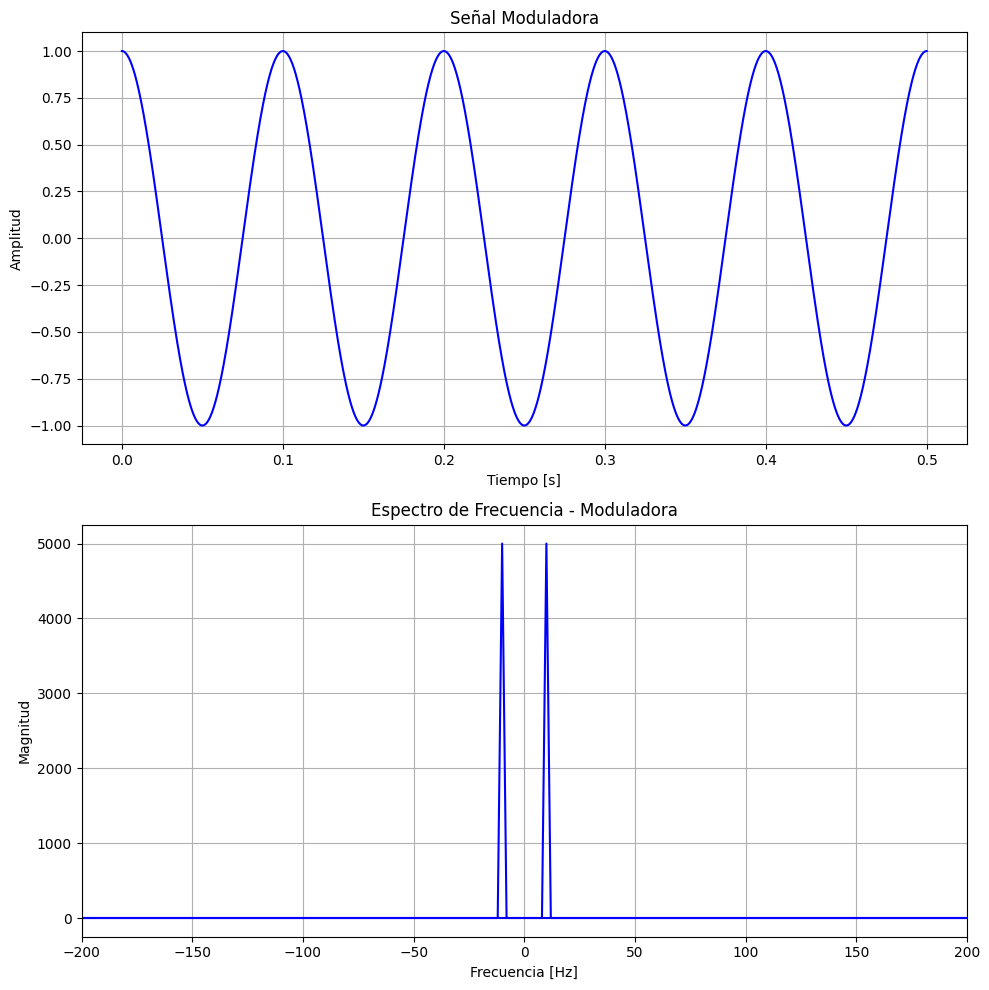

In [ ]:
# Crear subplots con dos filas y una columna
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Gráfica en el dominio del tiempo (Señal Moduladora)
axs[0].plot(t, m, 'b')
axs[0].set_title('Señal Moduladora')
axs[0].set_xlabel('Tiempo [s]')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)

# Gráfica en el dominio de la frecuencia (Espectro de Frecuencia - Moduladora)
axs[1].plot(freqs_m, M, 'b')
axs[1].set_title('Espectro de Frecuencia - Moduladora')
axs[1].set_xlabel('Frecuencia [Hz]')
axs[1].set_xlim(-200, 200)
axs[1].set_ylabel('Magnitud')
axs[1].grid(True)


# Ajustar el espaciado entre subplots
plt.grid
plt.tight_layout()
plt.show()

En las gráficas anteriores se puede observar la señal moduladora.
En el dominio del tiempo se observa que tal como se definió cumple con ser una señal de tono, con una amplitud de 2 dado que se requería que no fuese una señal que cruce por cero, para evitar la sobre-modulación, y de baja frecuencia, 10 Hz. Por tanto, se tiene la visualización del mensaje a transmitir. En el caso del dominio de la frecuencia se puede notar cómo su frecuencia es muy baja, muy cercana a 0 Hz.

**2. Señal portadora**

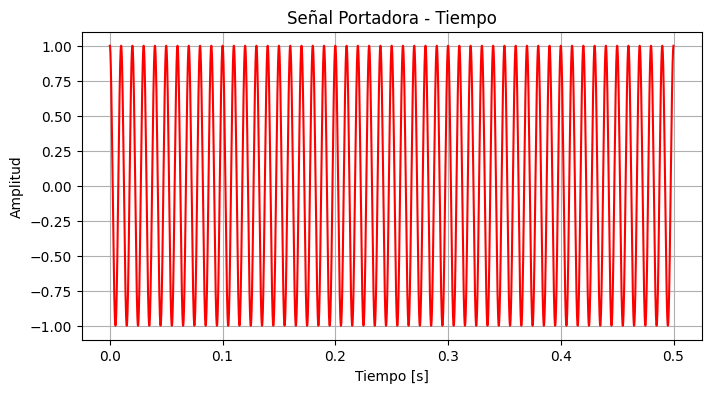

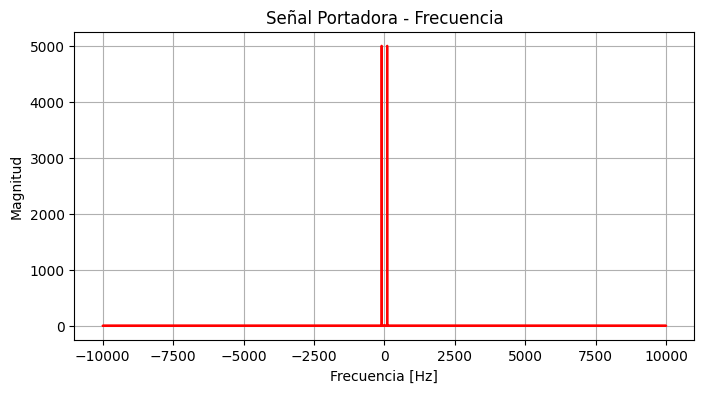

In [ ]:
# Señal Portadora - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, c, 'r')
plt.title('Señal Portadora - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Señal Portadora - Dominio de la frecuencia
plt.figure(figsize=(8, 4))
plt.plot(freqs_c, C, 'r')
plt.title('Señal Portadora - Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

La señal portadora es una onda sinusoidal de alta frecuencia que transporta la información modulada. En nuestra implementación, la frecuencia de la señal portadora se estableció en 80 Hz. Esta señal tiene una amplitud constante de 1 y su frecuencia determina la tasa a la cual la información será transmitida.

Análisis:

- Dominio del Tiempo: En la gráfica de la señal portadora en el dominio del tiempo, se observa una onda sinusoidal de amplitud constante a lo largo del tiempo. Esto confirma que la señal no contiene información útil en sí misma.

- Dominio de la Frecuencia: en este caso, se observan que su frecuencia es de 80 Hz. La cual se condiera como alta frecuencia en este caso, para poder observar mejor la señal.

Esta señal es fundamental en la modulación DSB-SC ya que brinda la estructura para transportar la información modulada, que se mezcla con ella para formar la señal modulada.






**3. Señal modulada**

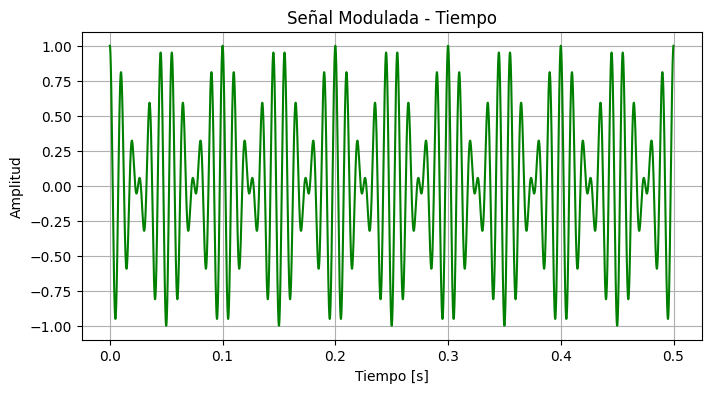

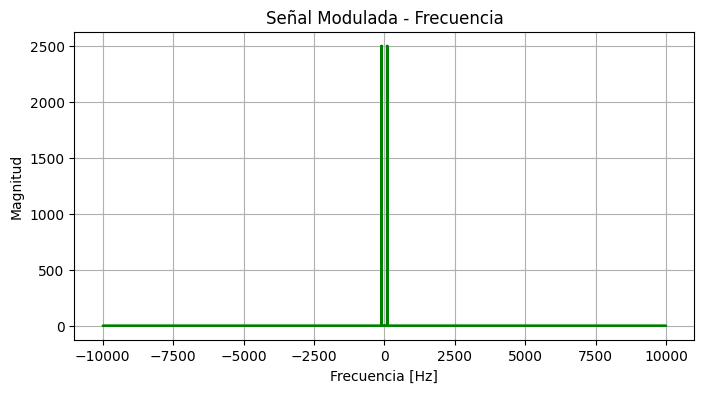

In [ ]:
# Señal Modulada - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, s, 'g')
plt.title('Señal Modulada - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Señal Modulada - Dominio de la frecuencia
plt.figure(figsize=(8, 4))
plt.plot(freqs_s, S, 'g')
plt.title('Señal Modulada - Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

La señal modulada es el resultado de la multiplicación de la señal moduladora por la señal portadora. En el caso de la modulación DSB-SC, esta operación produce una señal cuyas frecuencias laterales son suprimidas, llevando la información únicamente en la envolvente de la onda de la señal portadora.

Análisis:

1. Dominio del Tiempo: se observa una onda que varía en amplitud a medida que la señal moduladora cambia. La forma de onda refleja la envolvente de la señal moduladora, con ciclos de amplitud que dependen de la señal moduladora.

2. Dominio de la Frecuencia: Acá es donde se observa una estructura de bandas laterales, donde las frecuencias originales de la señal moduladora se desplazan hacia arriba y hacia abajo alrededor de la frecuencia de la portadora. Estas bandas laterales contienen la información modulada y están ubicadas simétricamente a ambos lados de la frecuencia de la portadora y es lo que caracteriza a este tipo de modulación DSC-SC.

Por lo tanto, como se comentó en las clases esta señal es el resultado de la modulación DSB-SC y lleva la información codificada en la envolvente de la onda portadora.

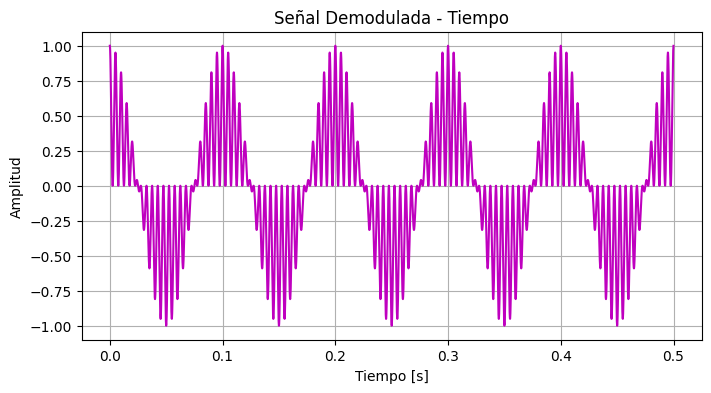

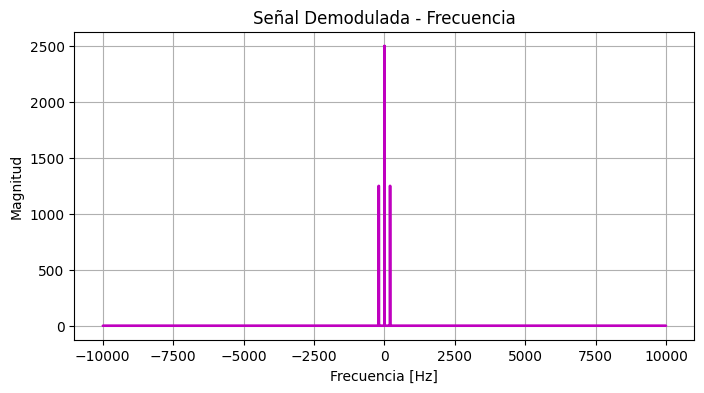

In [ ]:
# Señal Demodulada - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, d, 'm')
plt.title('Señal Demodulada - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Señal Demodulada - Dominio de la frecuencia
plt.figure(figsize=(8, 4))
plt.plot(freqs_d, D, 'm')
plt.title('Señal Demodulada - Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

- Dominio del tiempo: se observa que la señal tiene una forma de onda similar a la señal moduladora, lo que indica que se ha recuperado con el mensaje original después de la demodulación. Sin embargo, se nota que hay una ligera distorsión en la señal, especialmente en los bordes de los pulsos.

 - Dominio de la frecuencia: se observa que se ha conservado la estructura espectral de la señal moduladora, con las mismas frecuencias presentes. Acá se tiene el mensaje duplucado, pero en un valor cercano al doble del valor de la frecuencia de la portadora, así como el mensaje que se desea extraer en su respectiva frecuencia. Esto indica que el proceso de demodulación ha sido efectivo.

Si se compara la demodulada con la moduladora original, notamos que la señal demodulada tiene una amplitud ligeramente atenuada y algunas distorsiones de fase. Estas diferencias pueden ser causa de las características del filtro pasa bajos y al proceso de demodulación en sí mismo, puesto que se tendrán ciertas pérdidas.


#Señal final

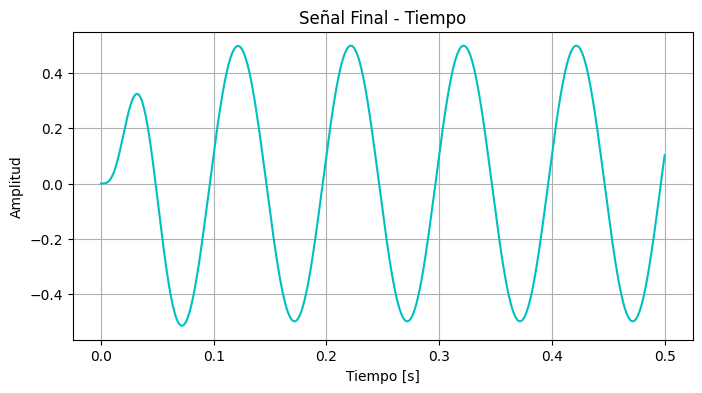

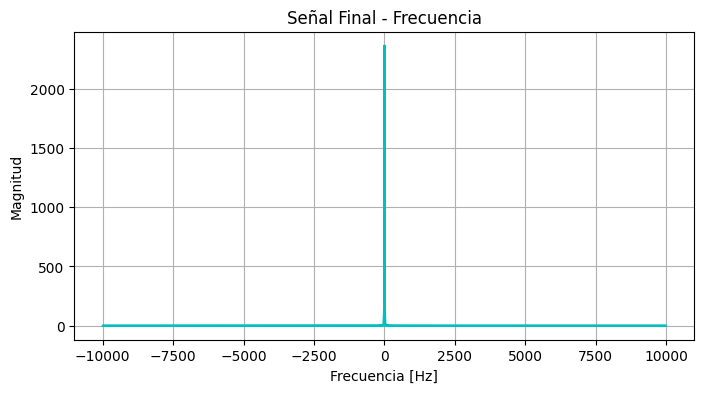

In [ ]:
# Señal final - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, y, 'c')
plt.title('Señal Final - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Señal final - Dominio de la frecuencia
plt.figure(figsize=(8, 4))
plt.plot(freqs_y, Y, 'c')
plt.title('Señal Final - Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

- Dominio del tiempo: después de aplicar el filtro pasabajas se tiene una forma de onda suavizada y atenuada en comparación con la señal demodulada, la cual es casi que igual a la recibida al inicio, con la mitad de su amplitud, es decir, con la amplitud unitaria original de la seañal. La atenuación se da por el efecto del filtro, que elimina componentes de alta frecuencia y suaviza la señal, dejando solo la información de interés de frecuencia más baja.

- Dominio de la frecuencia: las componentes de alta frecuencia han sido suprimidas, mientras que las componentes de baja frecuencia se conservan, lo cual era lo que se quería lograr con este tipo de modulación.

Finalmente, al comparar la señal final con la señal demodulada, notamos que la señal final tiene una amplitud más baja debido a la atenuación causada por el filtro pasabajos. Sin embargo, la forma general de la señal se conserva, lo que indica que la información principal ha sido preservada durante el proceso de filtrado. Incluso se puede confirmar ya que en el dominio de la frecuencia de nuevo se obtienen espectros en valores cercanos a cero, ya que la frecuencia del mensaje original es de 10 Hz.

En cuanto a la amplitud de la onda, se tiene que esta disminuyó en un factor de 1/2 dado que era lo que indicaba el enunciado.

# Actividad #2: Demodulador con error de frecuencia y ángulo de fase

Usando como base el sistema básico AM de tipo DSC-SC, construido en la sección anterior, introduzca una nueva señal de portadora en el bloque demodulador, de manera que pueda introducir errores controlados de ∆𝜔 y 𝜃.

 Algunas consideraciones:
    
  1. Puede asumir un canal óptimo sin pérdidas entre ambos bloques.
    
  2. Básicamente debe modificar la señal encerrada en rojo, indicada en el siguiente bloque, de manera que pueda introducir y controlar errores asociados a ∆𝜔 y 𝜃:

  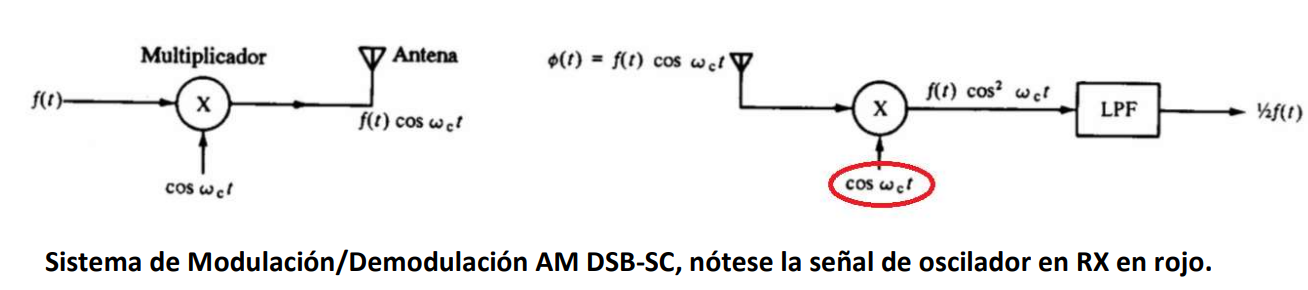

  3. Grafique todas las funciones y salidas involucradas, tanto en el tiempo como en la frecuencia. Sea ordenado en la forma en que lo presente en la notebook. Describa lo que observa en cada una de ellas.

  4. Haga un estudio completo del comportamiento de los efectos de las variaciones de ∆𝜔 y 𝜃 en el mensaje recuperado. Compare con los resultados de la Tarea 1, de este mismo documento. Indique claramente los efectos de los errores, por ejemplo, ¿A partir de donde no se puede recuperar el mensaje?

# Solución

Para solucionar esta parte, se va a partir del código utilizado para la actividad anterior, específicamente se utlizan las siguientes secciones:

  

*   Importación de librerías
*   Definición de parámtros
*   Definición de funciones para modulación, demoduladora transformadas de Fourier y filtros pasabajas

Cabe destacar que para este caso, se va a utilizar igualmente la función de domodulación de la actividad anterior, pues por la forma en la que está diseñada, toma la señal modulada y la multiplica por la portadora. En este caso, antes de llamar a la función se va a generar una **nueva señal portadora**, que sí contemple el error de frecuencia y de fase y luego, solamente se le ingresa la nueva portadora a la función demoduladora previamente realizada.



# Definición de la nueva portadora que permite introducir errores de frecuencia y fase

Para esta parte se le va a solicitar al usuario el porcentaje en que quiere que varíe la frecuencia ω y el ángulo de fase deseado θ en radianes. Se hizo de esta manera porque se considera que así resulta más sencillo para probar con diferentes variaciones y ppor ende poder analizar diferentes casos sin cambiar directamente el código.


In [ ]:
def PruebasErrores (pwc, errorFase):
  """
  # Se le solicita al usuario el porcentaje en que variar la frecuencia de la nueva portadora
  pwc = float(input("Ingrese el porcentaje en que desea variar la frecuencia wc: "))
  # Se le solicita al usuario el el ángulo de fase que le desea agregar a la nueva portadora para la demodulación
  errorFase = float(input("Ingrese el ángulo de fase en radianes que desea agregar para la demodulación: "))
"""
  # Se obtiene el valor de la frecuencia ya con la variación deseada por el usuario
  Dwc = (2 * np.pi * fc) * (1 + (pwc / 100))
  # Se genera la nueva señal portadora que contempla errores de frecuencia y fase
  n_portadora = Ac * np.cos((Dwc * t) + errorFase)

  # Se obtiene la señal modulada, igual que en el ejemplo anterior
  # En este caso se utiliza la PORTADORA ORIGINAL definida en la actividad 1
  s = modulacion(m, c)

  # Se obtiene la señal demodulada utilizando la NUEVA PORTADORA
  dE = demodulacion(s, n_portadora)

  # Aplicar el filtro, se obtiene la señal final
  ye = butter_lowpass_filter(dE, cutoff, fs, order)

  freqs_yE, YE = transformada_fourier(ye, fs)  # Transformada de Fourier de la señal filtrada/resultante de la salida con errores
  freqs_np, NP = transformada_fourier(n_portadora, fs)  # Transformada de Fourier de la señal portadora nueva
  freqs_dE, DE = transformada_fourier(dE, fs)  # Transformada de Fourier de la señal demodulada

  return n_portadora, s, dE, ye, freqs_yE, YE, freqs_np, NP, freqs_dE, DE


n_portadora, s, dE, ye, freqs_yE, YE, freqs_np, NP, freqs_dE, DE = PruebasErrores (5, 0)

#Graficación de los resultados

**1. Señal moduladora**


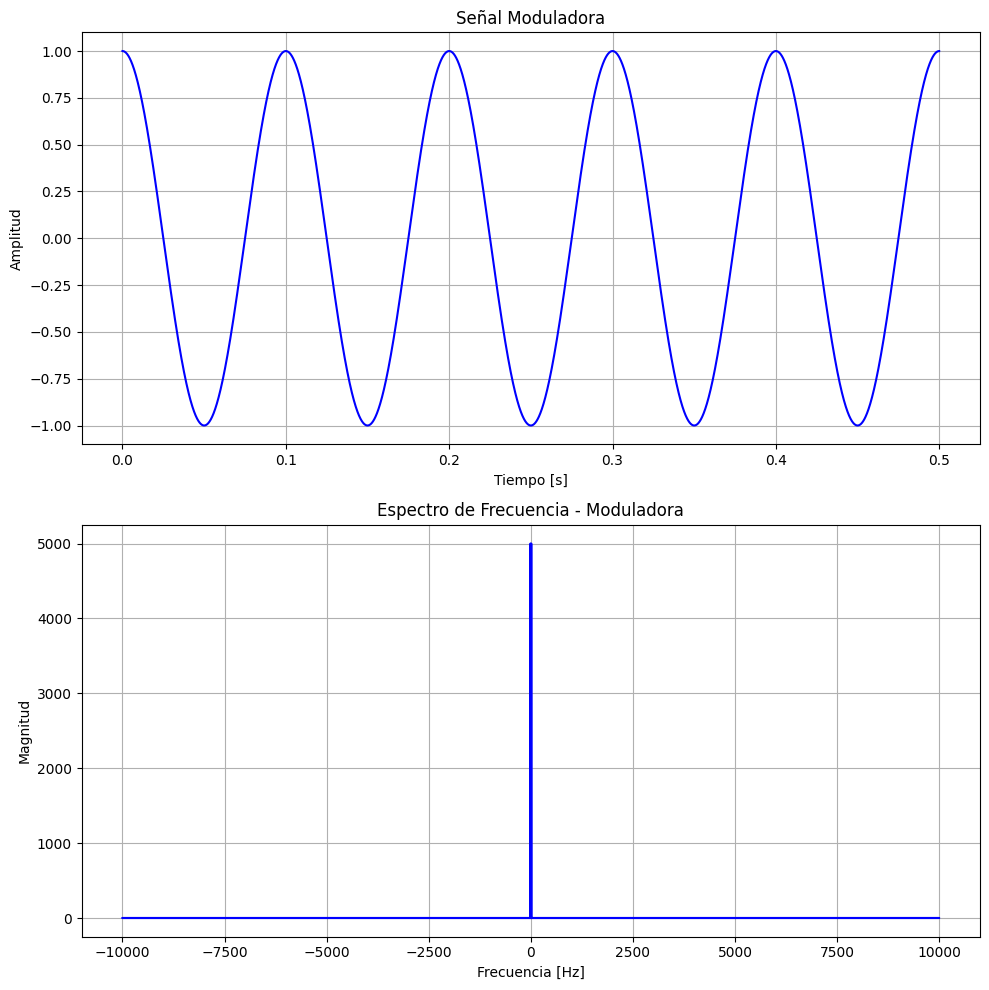

In [ ]:
# Crear subplots con dos filas y una columna
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Gráfica en el dominio del tiempo (Señal Moduladora)
axs[0].plot(t, m, 'b')
axs[0].set_title('Señal Moduladora')
axs[0].set_xlabel('Tiempo [s]')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)

# Gráfica en el dominio de la frecuencia (Espectro de Frecuencia - Moduladora)
axs[1].plot(freqs_m, M, 'b')
axs[1].set_title('Espectro de Frecuencia - Moduladora')
axs[1].set_xlabel('Frecuencia [Hz]')
axs[1].set_ylabel('Magnitud')
axs[1].grid(True)


# Ajustar el espaciado entre subplots
plt.grid
plt.tight_layout()
plt.show()

**Análisis de la señal moduladora**

Como se puede apreciar, esta señal no tene ningún cambio con respecto a la que se graficó en la primera parte, lo cual tiene sentido pues se quieren visualizar los efectos de un error de frecuencia y fase en la etapa de demodulación. De esta función lo que cabe resaltar es que se le agregó un offset de 1, de modo que la señal no tenga cambios de sgno y que por ende no genere el problema de sobredemodulación, que es común en la modulación por portadora suprmida.


**2. Portadora para la modulación**

Esta señal se utiliza para la modulación del mensaje en baja frecuencia, esta no contempla errores de frecuencia ni de fase.

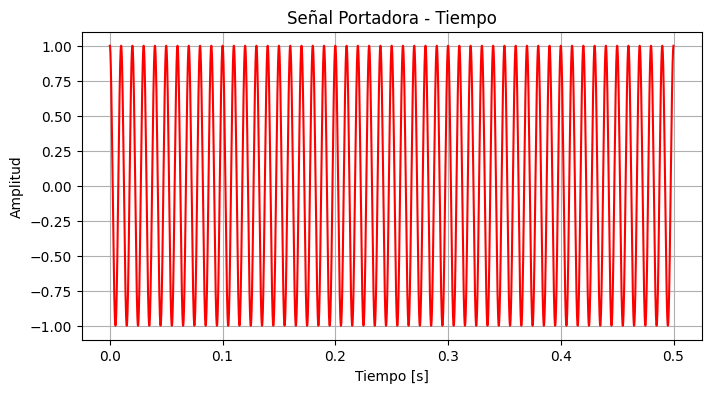

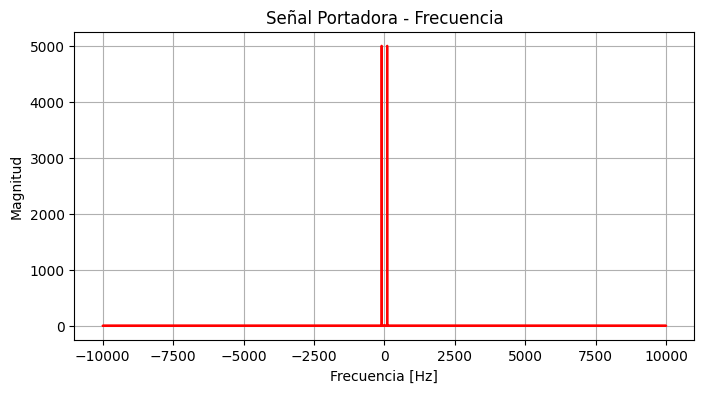

In [ ]:
# Señal Portadora Original - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, c, 'r')
plt.title('Señal Portadora - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Señal Portadora Original- Dominio de la frecuencia
plt.figure(figsize=(8, 4))
plt.plot(freqs_c, C, 'r')
plt.title('Señal Portadora - Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

**Análisis de la señal portadora para la modulación**

Esta señal es la que se utiliza para modular el mensaje que se desea enviar, como se puede notar, esta es exactamente igual a la señal portadora utilizada en la actividad 1. La razón por la que esta señal no se mantene igual es porque el objetivo del ejercicio es observar lo que sucede cuando ocurre un  problema en la estapa de demodulación. Específicamente, si ocurre un error en la frecuencia o el ángulo de fase de la señal portadora en la etapa de demodulacón, que es algo que puede ocurrir en la realidad.


**3. Señal modulada**

En este caso se muestra el resultado de la modulación del mensaje con la portadora original.

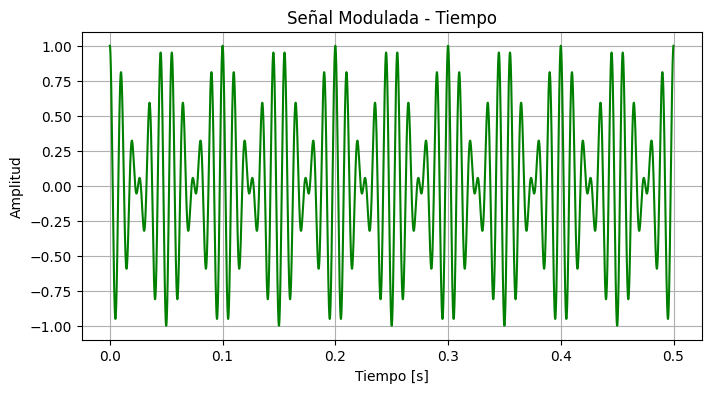

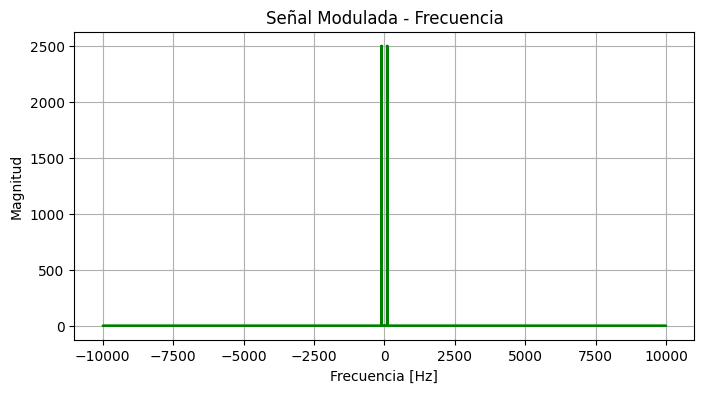

In [ ]:

# Señal Modulada - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, s, 'g')
plt.title('Señal Modulada - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Señal Modulada - Dominio de la frecuencia
plt.figure(figsize=(8, 4))
plt.plot(freqs_s, S, 'g')
plt.title('Señal Modulada - Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

**Análisis de la señal modulada**

Como era de esperarse, la señal modulada tampoco presenta cambios con respecto a la actividad anterior, pues en esta estapa no se está considerando ningún tipo de error de fase o frecuencia. Además, se puede notar que tiene sobremodulación, lo cual era de esperarse ya que la señal moduladora presenta cambios de signo. Otro indicativo de la sobremodulación es que no se logran formar las señales envolventes o bien, estas también están cruzadas entre ellaS como se muestra a continuación:

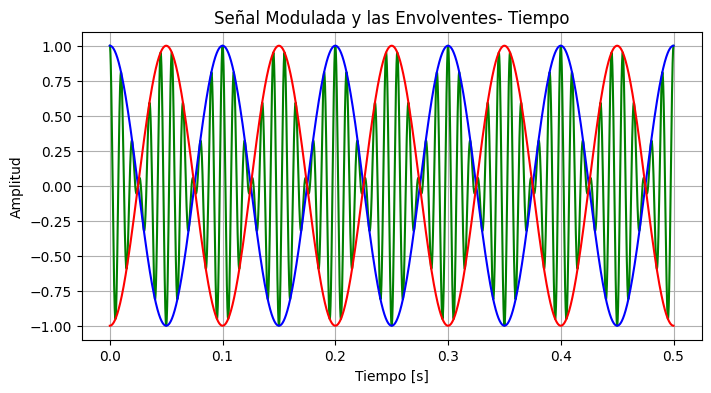

In [ ]:
# Señal Modulada y señales envolventes - Dominio del tiempo
es = Am * np.cos(2 * np.pi * fm * t)
ei = Am * np.cos(2 * np.pi * fm * t - np.pi)
plt.figure(figsize=(8, 4))
plt.plot(t, s, 'g')
plt.plot(t, es, 'b')
plt.plot(t, ei, 'r')
plt.title('Señal Modulada y las Envolventes- Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

**4. Señal portadora para la demodulación**

Ahora se muestra la señal portadora en la que se contemplan los errores de frecuencia y fase solicitados. Esta es la señal que se utilizó para la función de demodulación del mensaje.

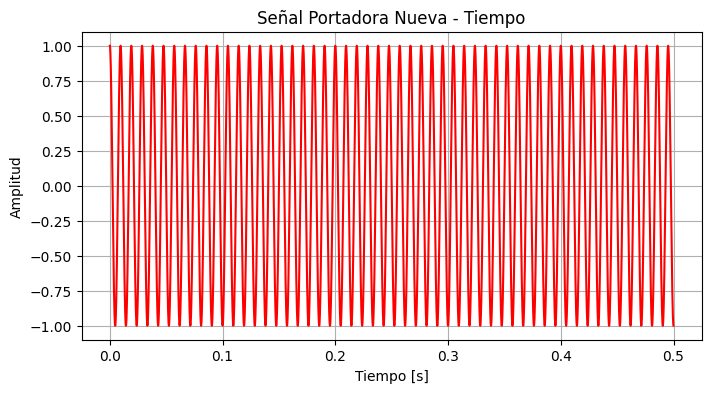

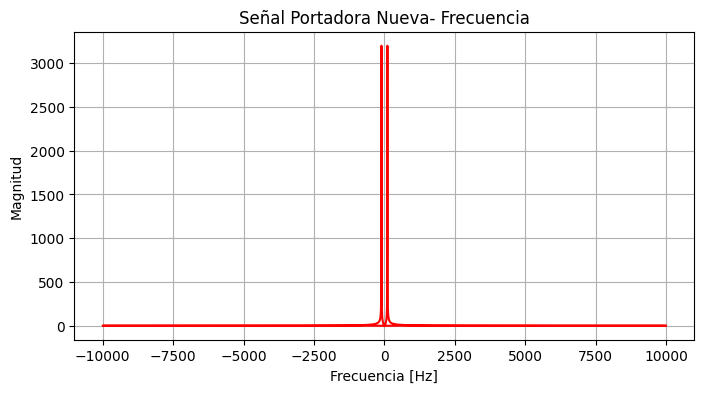

In [ ]:
# Señal Portadora Con Errores - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, n_portadora, 'r')
plt.title('Señal Portadora Nueva - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Señal Portadora Con Errores- Dominio de la frecuencia
plt.figure(figsize=(8, 4))
plt.plot(freqs_np, NP, 'r')
plt.title('Señal Portadora Nueva- Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

**Análisis de la señal portadora para la demodulación**

En este caso, se muestra la señal portadora con un error en la frecuencia del 5% y con un error de desfase de 0 radianes. Acá es difícl de apreciar la diferencia que tiene esta gráfica con respecto a la portadora original, es por ello que se va a procede a realizar una gráfica donde se comparan ambas.

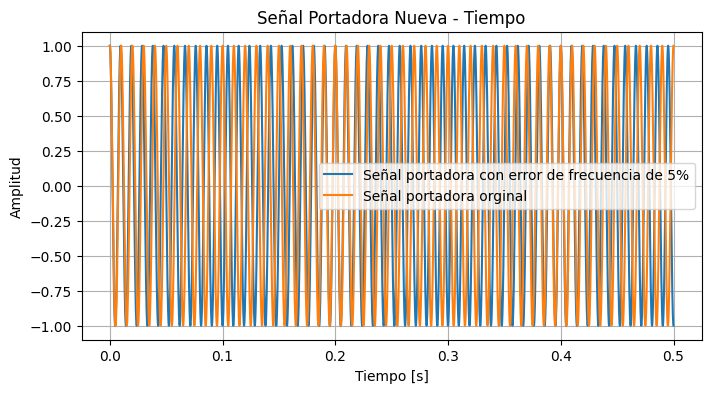

In [ ]:
# Señal Portadora Con Errores - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.title('Señal Portadora Nueva - Tiempo')
plt.plot(t, n_portadora, label='Señal portadora con error de frecuencia de 5%')
plt.plot(t, c, label='Señal portadora orginal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Como se puede apreciar en la figura anterior, la diferencia entre ambas gráficas es la frecuencia, se puede notar que efectivamente la señal azul (nueva portadora) tiene una mayor frecuencia que la naranja (portadora orginal). Además de esto, es evidente que no existen diferencias en el desfase de ambas señales. Este caso se va a investigar posteriormente.

**5. Señal demodulada**

Este es el resultado de la demodulación, acá se comienzan a notar los efectos que tienen los errores de frecuencia y fase en la demodulación de un mensaje.

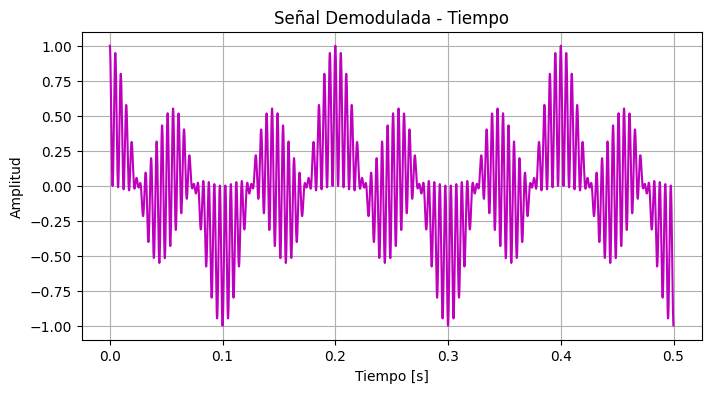

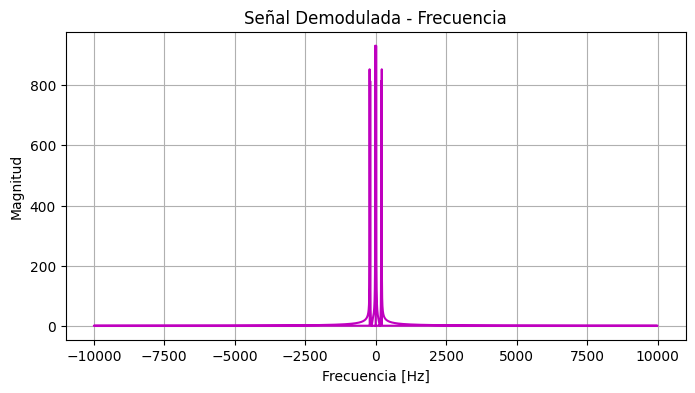

In [ ]:
# Señal Demodulada - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, dE, 'm')
plt.title('Señal Demodulada - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Señal Demodulada - Dominio de la frecuencia
plt.figure(figsize=(8, 4))
plt.plot(freqs_dE, DE, 'm')
plt.title('Señal Demodulada - Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

**6. Señal final**

En esta parte se muestra el resultado del filtrado de la señal demodulada, en teoría este corresponde al mensaje original, no obstante este pudo ser alterado por los errores agregados.

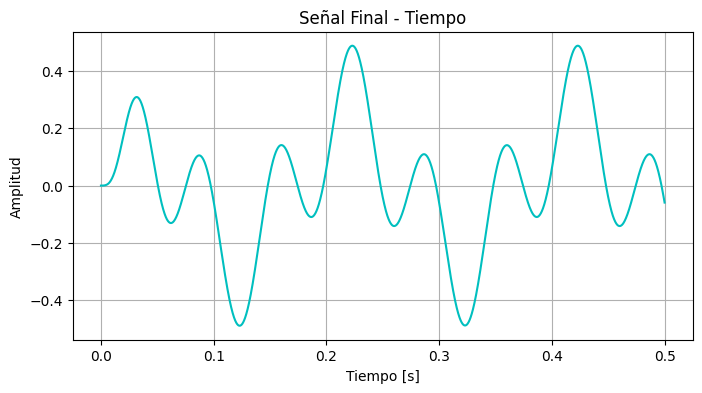

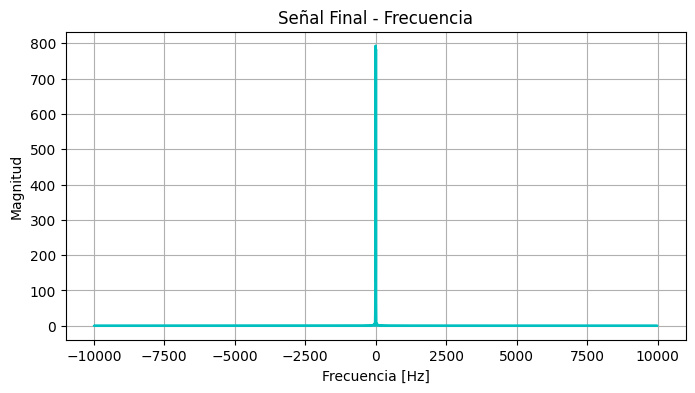

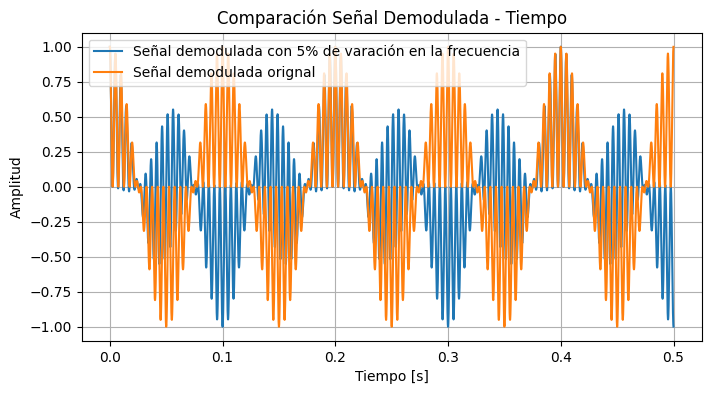

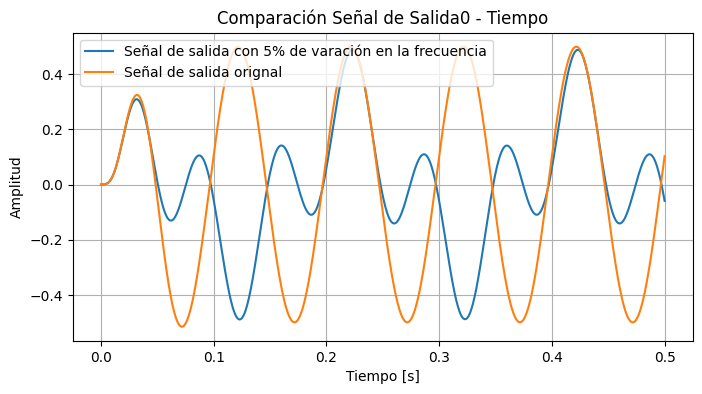

In [ ]:
# Señal final - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, ye, 'c')
plt.title('Señal Final - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Señal final - Dominio de la frecuencia
plt.figure(figsize=(8, 4))
plt.plot(freqs_yE, YE, 'c')
plt.title('Señal Final - Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

# Gráficas comparativas demodulación - Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, dE, label='Señal demodulada con 5% de varación en la frecuencia')
plt.plot(t, d, label='Señal demodulada orignal')
plt.title('Comparación Señal Demodulada - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Gráficas comparativas de salida- Dominio del tiempo
plt.figure(figsize=(8, 4))
plt.plot(t, ye, label='Señal de salida con 5% de varación en la frecuencia')
plt.plot(t, y, label='Señal de salida orignal')
plt.title('Comparación Señal de Salida0 - Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()



**Análisis de la señal demodulada y señal final**

En este caso, se puede notar que ambas señales tienen un comportamiento completamente diferente al de la señal demodulada y señal final obtenidas en la primera actividad. Como se puede apreciar en la señal de salida, se vio bastante afectada por esta pequeña variación de frecuencia en la portadora de la demodulación y su comportamiento únicamente coincide con la original en los picos positivos. Es esperable que este efecto se intensifique al aumentar el porcentaje de variación de la frecuencia.

# Experimentos adicionales

A contnuación, se van a realizar una serie de experimentos para poder observar el comportamiento de la demodulación introduciendo diferentes errores. Sn embargo, primero se van a crear una función de graficación, que solamente muestra las señales que van a cambiar.

In [ ]:
def GraficasAct2 (n_portadora, s, dE, ye, freqs_yE, YE, freqs_np, NP, freqs_dE, DE, d):

  # Señal Portadora - Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(t, n_portadora, 'r')
  plt.title('Señal Portadora Nueva (con error) - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.grid(True)
  plt.show()

  # Señal Portadora - Dominio de la frecuencia
  plt.figure(figsize=(8, 4))
  plt.plot(freqs_np, NP, 'r')
  plt.title('Señal Portadora Nueva (con error)- Frecuencia')
  plt.xlabel('Frecuencia [Hz]')
  plt.ylabel('Magnitud')
  plt.grid(True)
  plt.show()

  # Señal Demodulada - Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(t, dE, 'm')
  plt.title('Señal Demodulada (con error) - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.grid(True)
  plt.show()

  # Señal Demodulada - Dominio de la frecuencia
  plt.figure(figsize=(8, 4))
  plt.plot(freqs_dE, DE, 'm')
  plt.title('Señal Demodulada (con error) - Frecuencia')
  plt.xlabel('Frecuencia [Hz]')
  plt.ylabel('Magnitud')
  plt.grid(True)
  plt.show()

  # Señal final - Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(t, ye, 'c')
  plt.title('Señal Final - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.grid(True)
  plt.show()

  # Señal final - Dominio de la frecuencia
  plt.figure(figsize=(8, 4))
  plt.plot(freqs_yE, YE, 'c')
  plt.title('Señal Final - Frecuencia')
  plt.xlabel('Frecuencia [Hz]')
  plt.ylabel('Magnitud')
  plt.grid(True)
  plt.show()

  # Gráficas comparativas demodulación - Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(t, dE, label='Señal demodulada con error')
  plt.plot(t, d, label='Señal demodulada orignal')
  plt.title('Comparación Señal Demodulada - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Gráficas comparativas de salida- Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(t, ye, label='Señal de salida con error')
  plt.plot(t, y, label='Señal de salida orignal')
  plt.title('Comparación Señal de Salida - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.legend()
  plt.grid(True)
  plt.show()

  return

**Experimento # 2**

En este caso, se va a aumentar el porcentaje de variación de la frecuencia a un 10% y se va a mantener el ángulo de fase en 0 radianes.

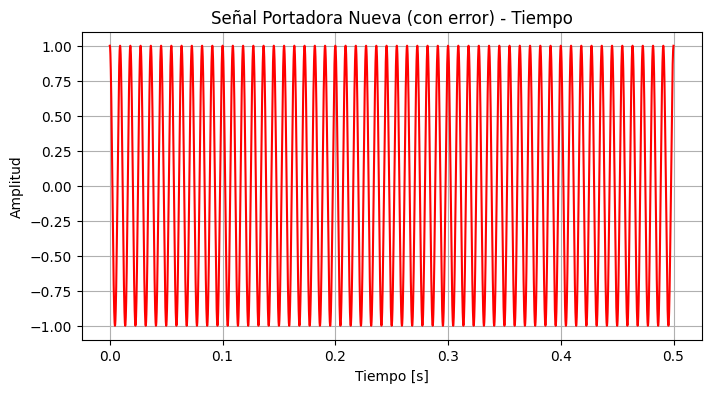

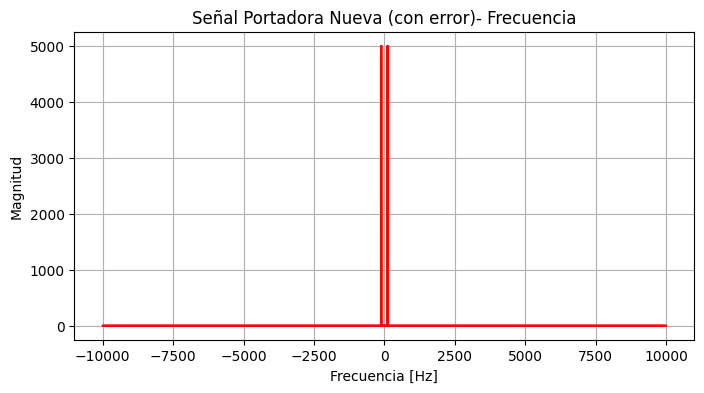

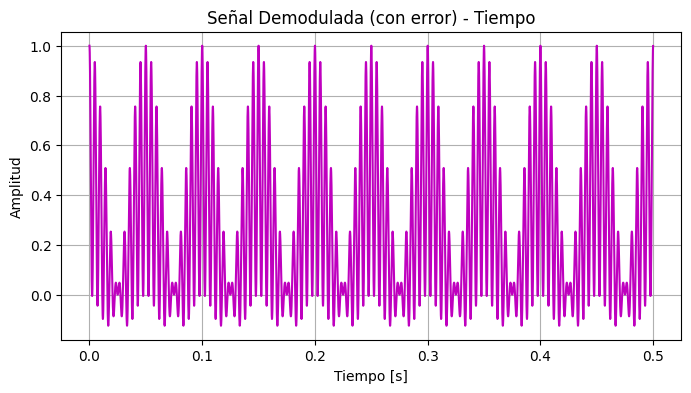

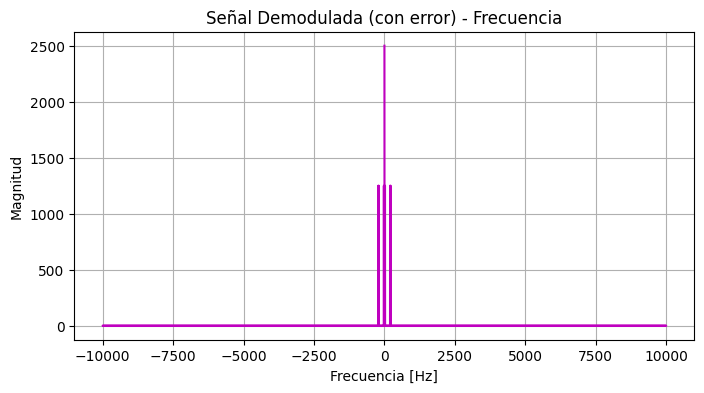

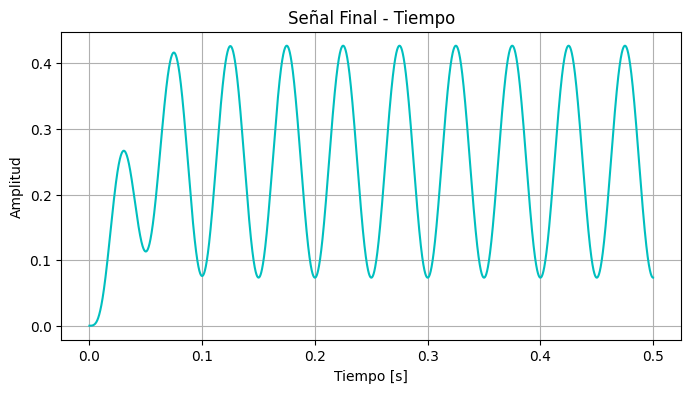

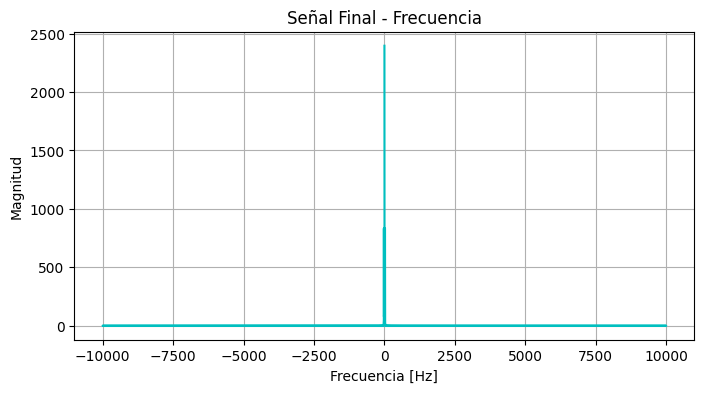

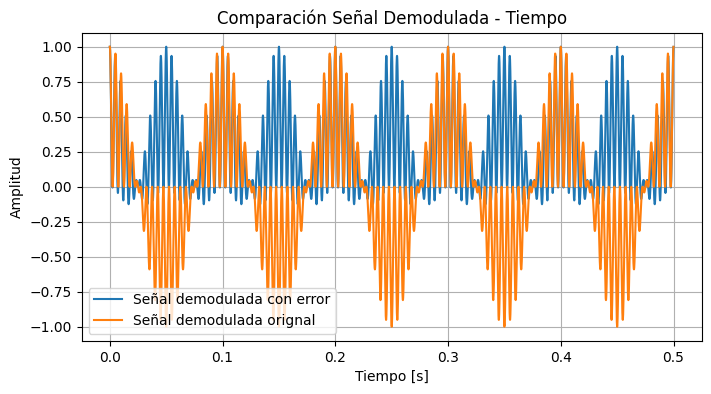

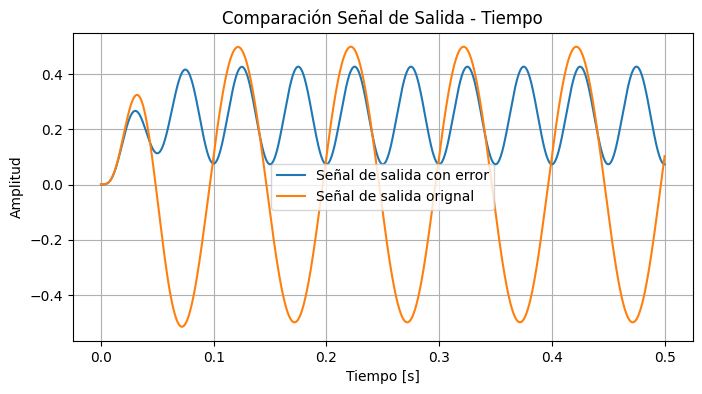

In [ ]:
n_portadora2, s2, dE2, ye2, freqs_yE2, YE2, freqs_np2, NP2, freqs_dE2, DE2 = PruebasErrores (10, 0)
GraficasAct2 (n_portadora2, s2, dE2, ye2, freqs_yE2, YE2, freqs_np2, NP2, freqs_dE2, DE2, d)

**Análisis de los resultados del experimento 2**

Como se puede apreciar, las señales de salida presentan menos coincidencia entre ellas, de hecho, ya no tiene una amplitud similar a la original. Adempas, se puede notar que claramente se incrementó la frecuencia de la señal con error, y esta es casi del doble que la orginal. También se puede notar como la señal con error tiene un offset que la original no. Por todas estas razones, en este punto se podría decir que el mensaje comienza a ser irreconocible.

**Experimento #3**

Ahora más bien se va a variar la frecuencia en un 45% y se va a dejar el ángulo de fase en 0 radianes.

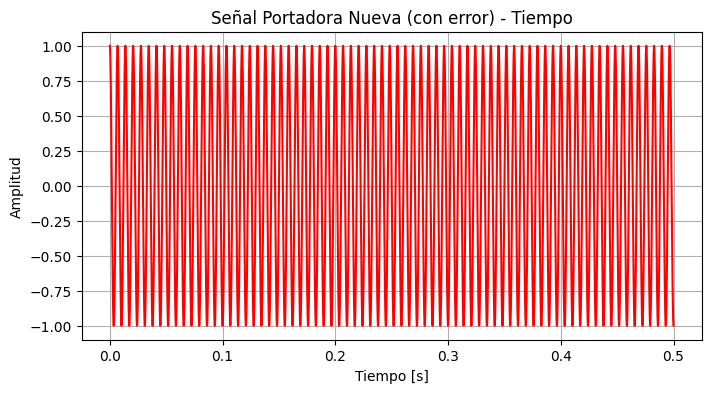

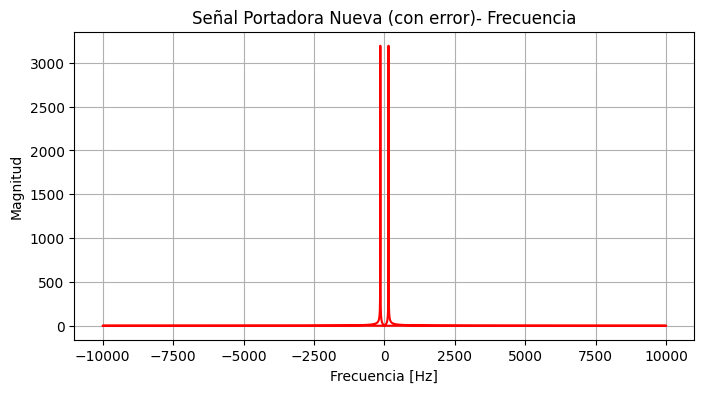

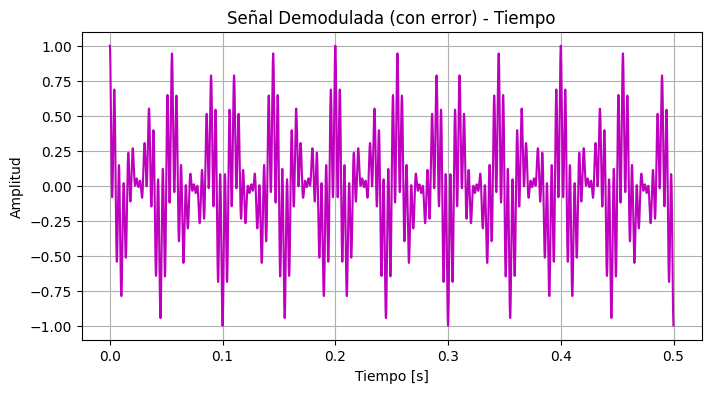

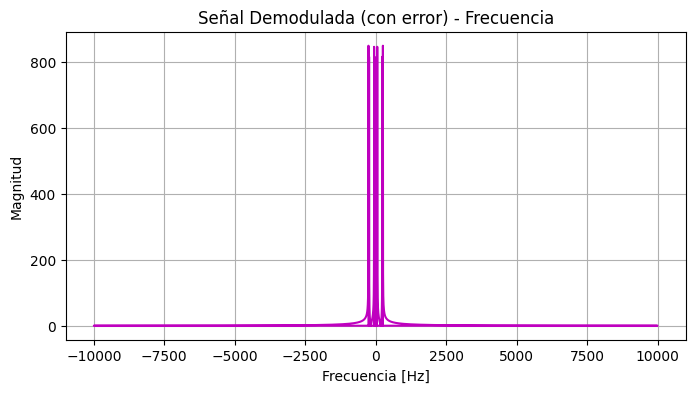

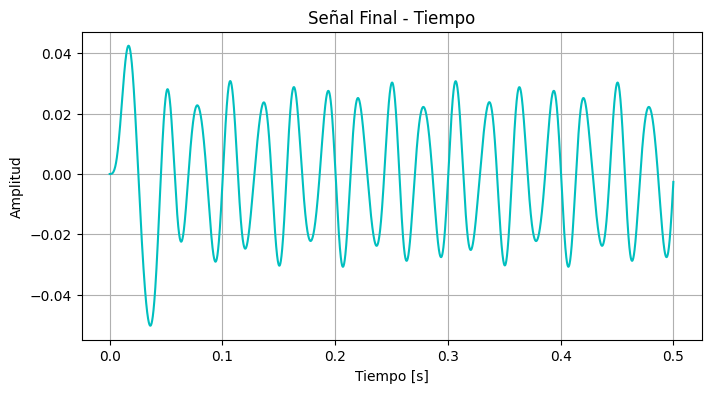

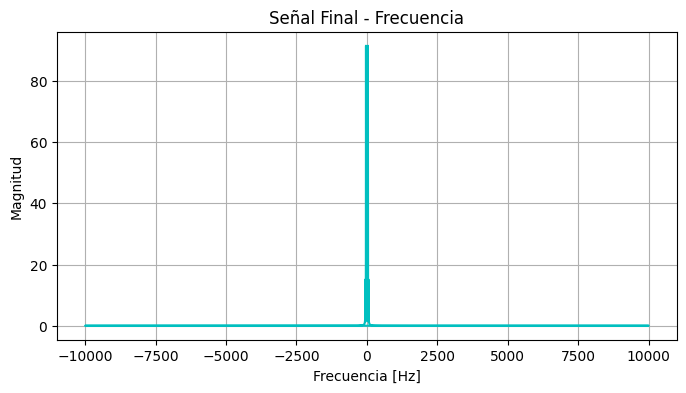

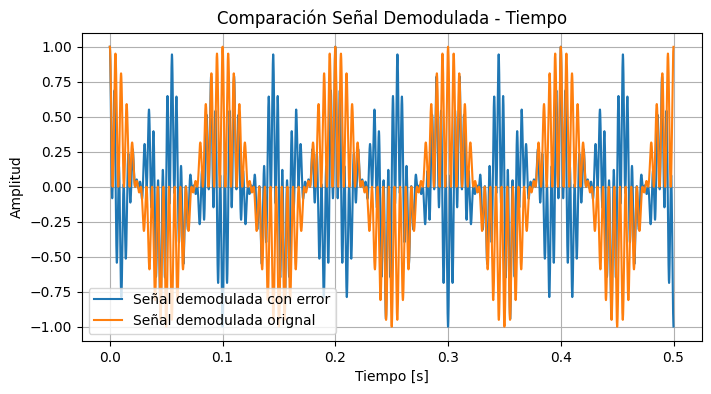

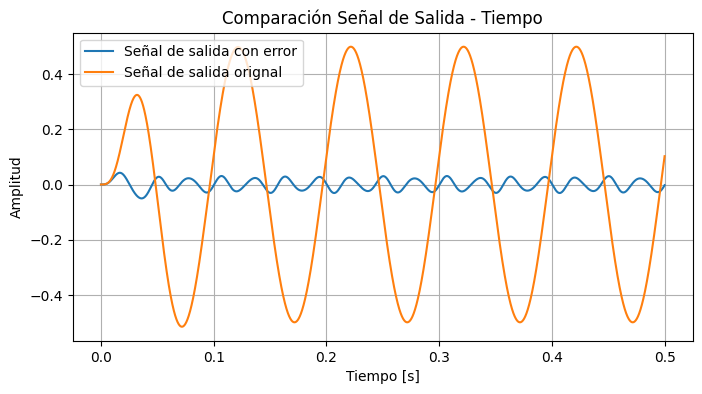

In [ ]:
n_portadora3, s3, dE3, ye3, freqs_yE3, YE3, freqs_np3, NP3, freqs_dE3, DE3 = PruebasErrores (45, 0)

GraficasAct2 (n_portadora3, s3, dE3, ye3, freqs_yE3, YE3, freqs_np3, NP3, freqs_dE3, DE3, d)

**Análisis de resultados del experimento 3**

Como se puede apreciar que hay muy poca coincidencia entre ambas señales, lo cual era esperable. Por tanto, se confirma que el mensaje ya dejó de ser recuperable. Por lo tanto, entre mayor sea el error de variación en la frecuencia de la portadora del bloque demodulador, es más dfícil recuperar el mensaje hasta que se alcanza el punto en el que ya no es reconocible, en este caso con un error del 45%.

**Experimento #4**

En este caso se va a agregar únicamnete un error de desfase de π/4 radianes y la variación de la frecuencia va a ser de 0%.

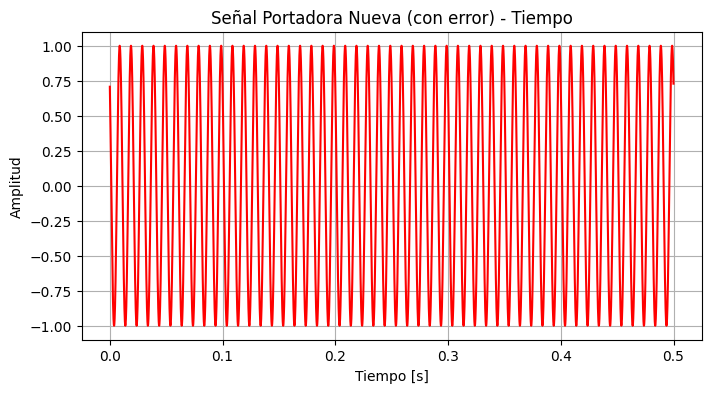

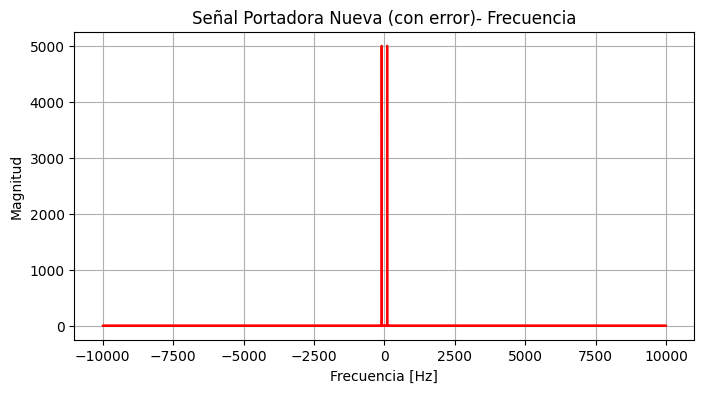

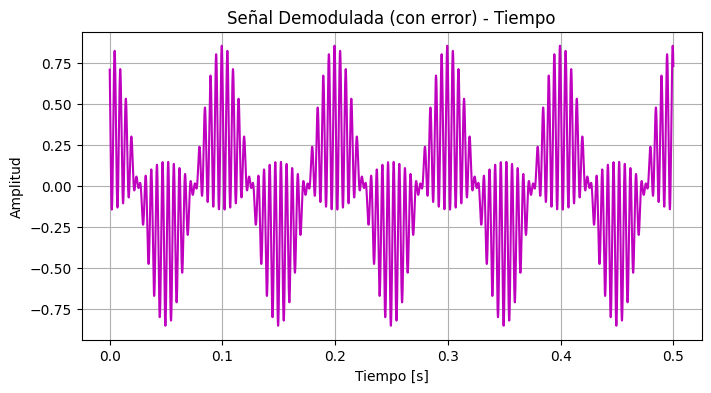

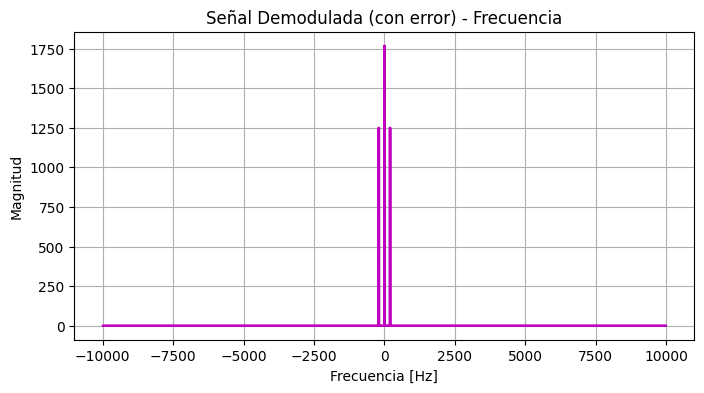

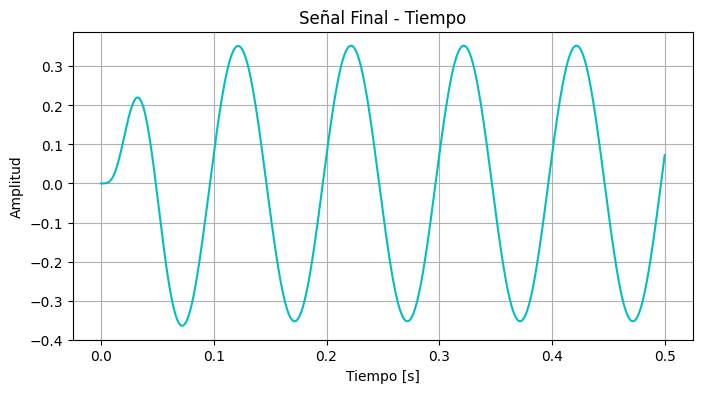

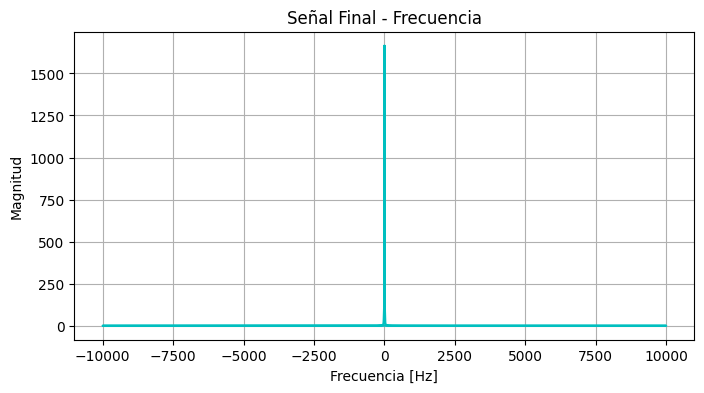

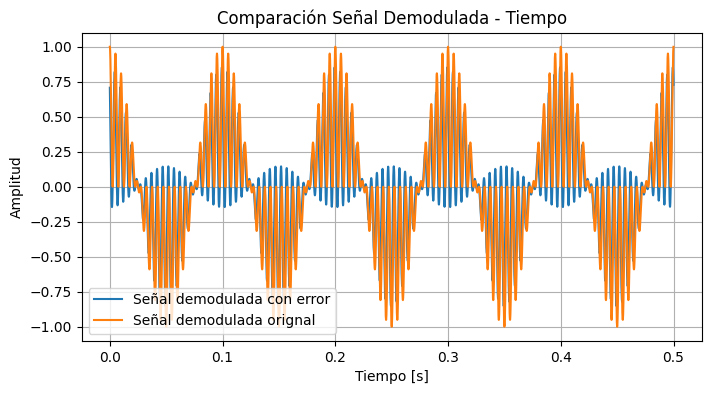

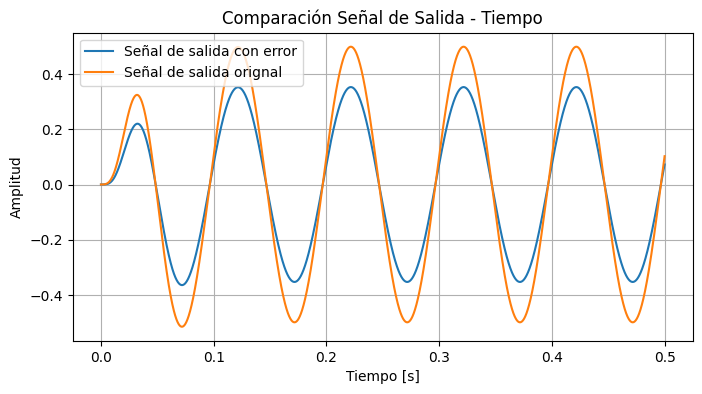

In [ ]:
n_portadora4, s4, dE4, ye4, freqs_yE4, YE4, freqs_np4, NP4, freqs_dE4, DE4 = PruebasErrores (0, np.pi/4)

GraficasAct2 (n_portadora4, s4, dE4, ye4, freqs_yE4, YE4, freqs_np4, NP4, freqs_dE4, DE4, d)

**Análisis de resultados del experimento 4**
En este caso, se puede notar que el cambio en el ángulo de fase no generó cambios signifcativos en el mensaje final con respecto al que no tenía errores. La única diferencia es una reduccón en la amplitud de la señal, pero esta se podría recuperar con un amplificador. Ahora se va a incrementar este desfase para ver si mantiene esta relación.

**Experimento #5**

Ahora se va a incrementar el desfase a π/2, manteniendo la variación de la frecuencia en 0%.

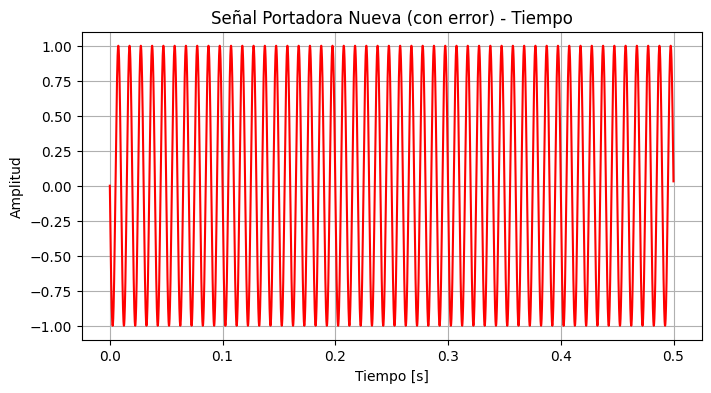

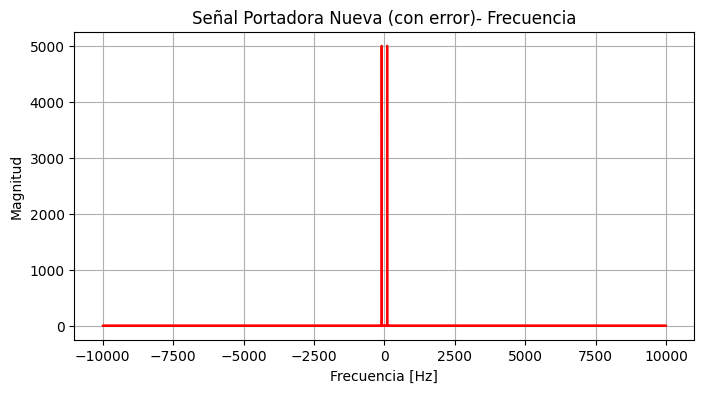

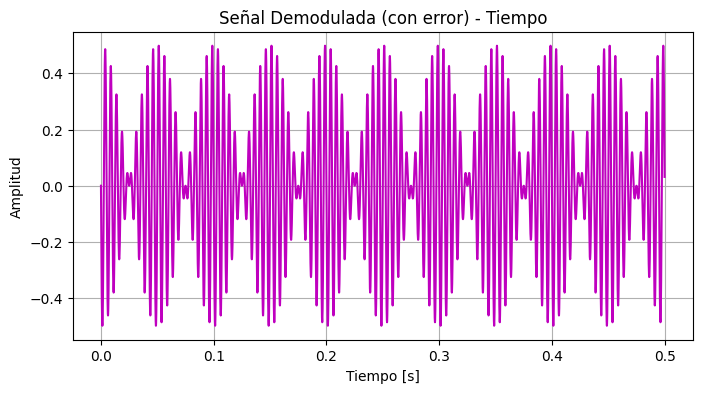

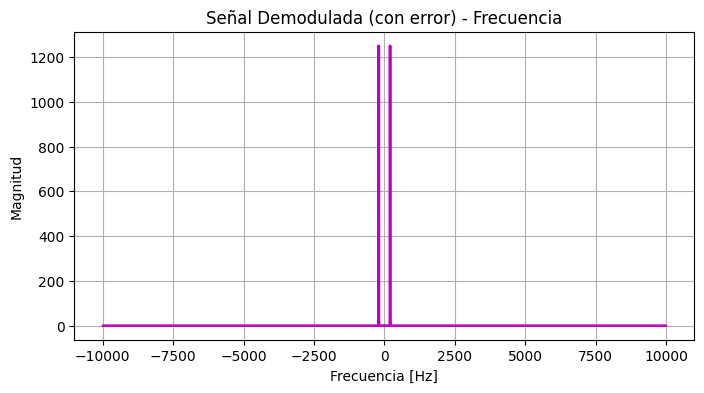

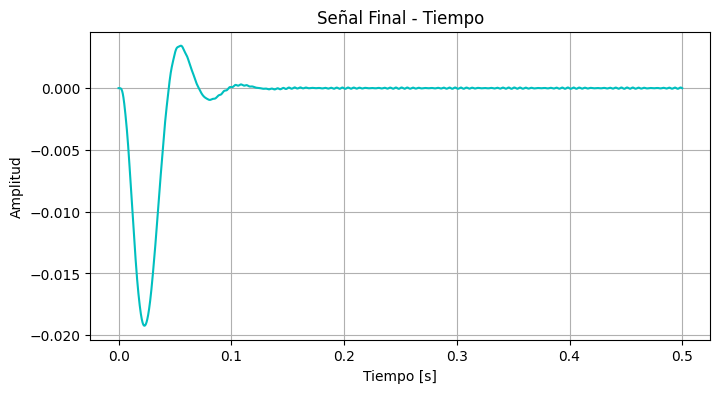

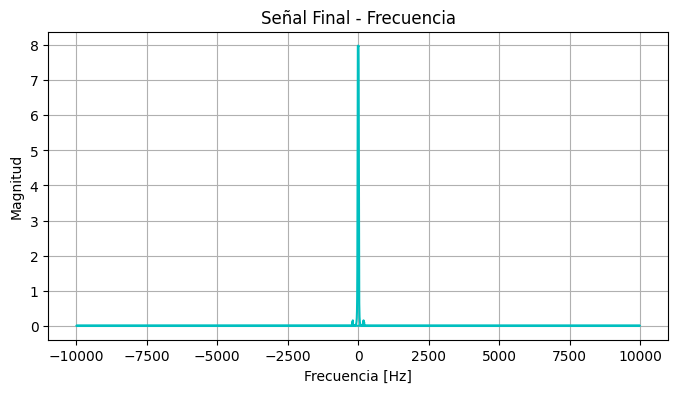

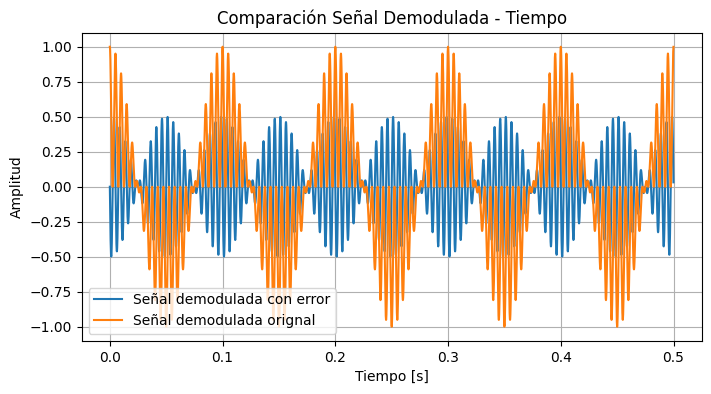

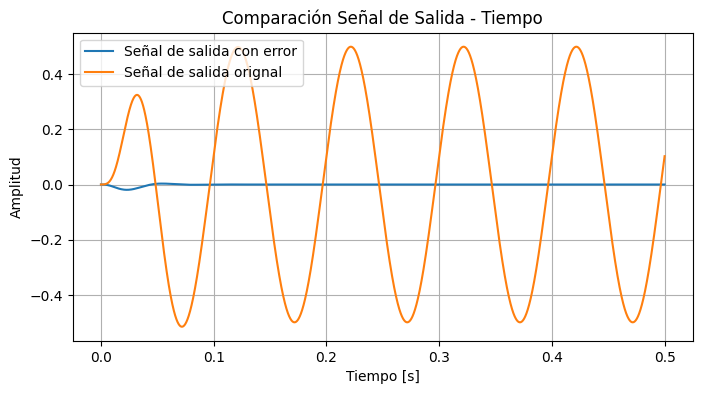

In [ ]:
n_portadora5, s5, dE5, ye5, freqs_yE5, YE5, freqs_np5, NP5, freqs_dE5, DE5 = PruebasErrores (0, np.pi/2)

GraficasAct2 (n_portadora5, s5, dE5, ye5, freqs_yE5, YE5, freqs_np5, NP5, freqs_dE5, DE5, d)

**Análisis de resultados del experimento 5**

Como se puede apreciar de los resultados anteriores, al incrementar el ángulo a π/2 hace que ya se pierda el mensaje. Ahora, se va a reslizar una última prueba para verificar si es a partir de este valor que ya el mensaje no puede ser recuperado

**Experimento #6**

Por último, se va a utlizar un desfase de π/2.1, manteniendo la variación de la frecuencia en 0%. En este caso, se va a probar con un valor similar a π/2, para ver s a partr de este valor ya es imposible recuperar el mensaje.

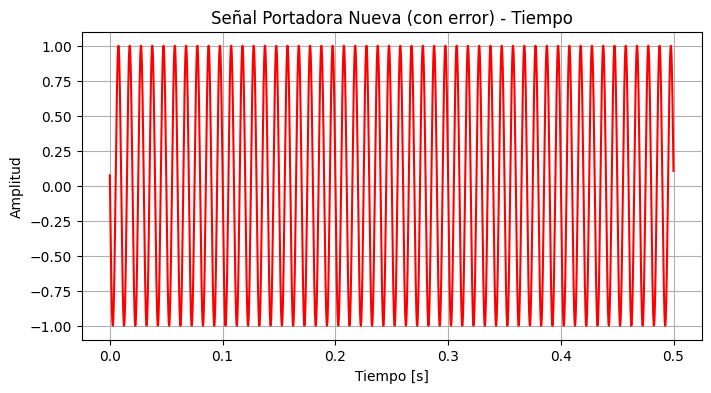

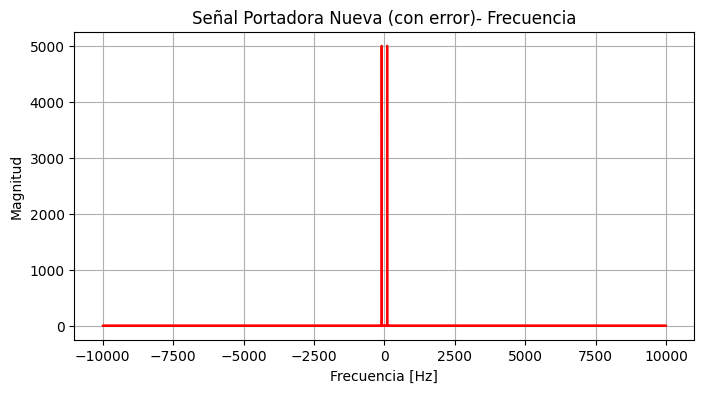

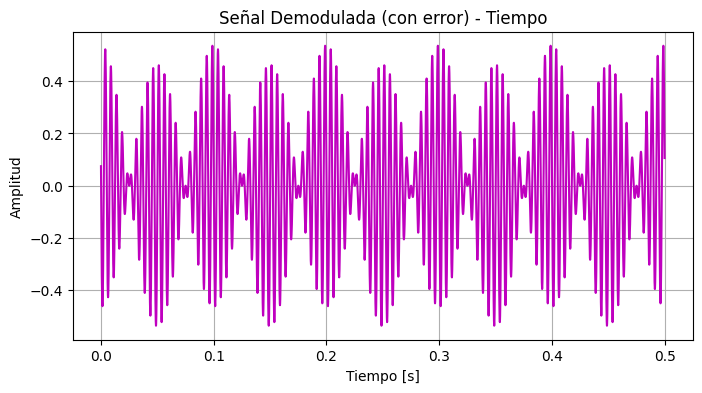

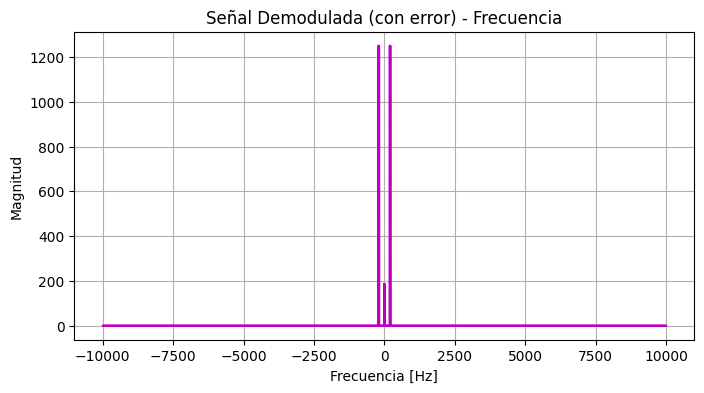

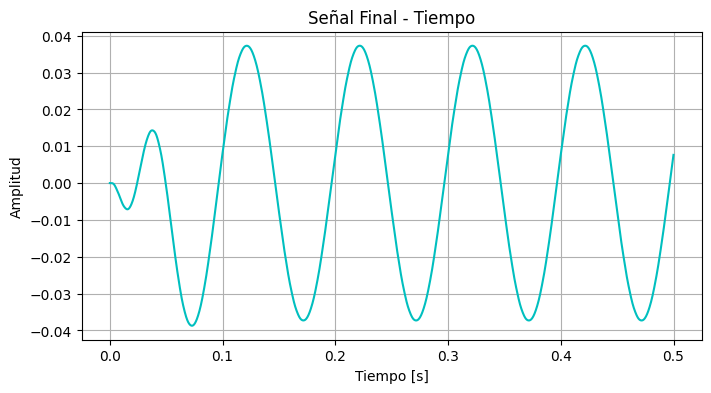

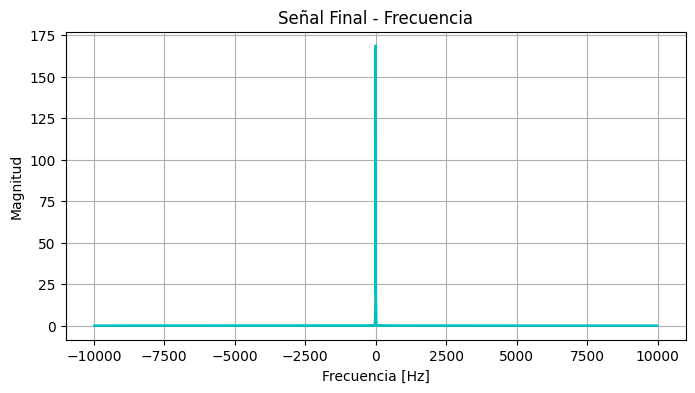

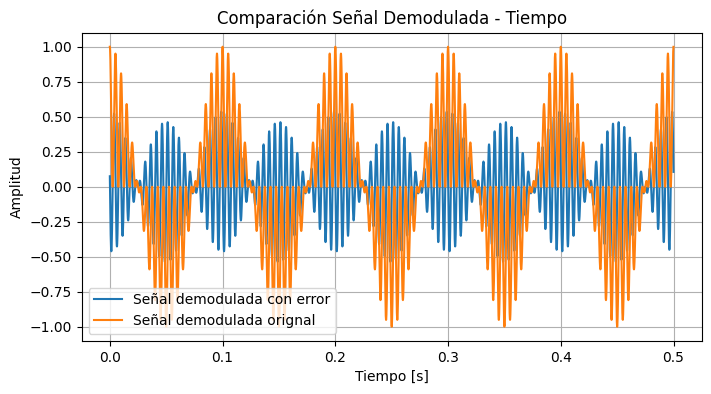

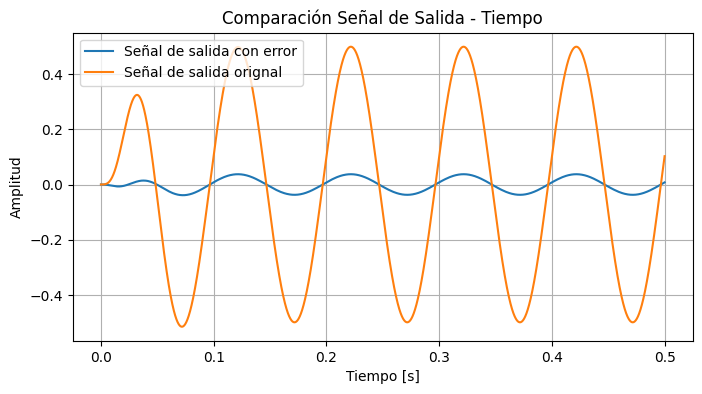

In [ ]:
n_portadora6, s6, dE6, ye6, freqs_yE6, YE6, freqs_np6, NP6, freqs_dE6, DE6 = PruebasErrores (0, np.pi/2.1)

GraficasAct2 (n_portadora6, s6, dE6, ye6, freqs_yE6, YE6, freqs_np6, NP6, freqs_dE6, DE6, d)

**Análisis de resultados del experimento 6**
Como se puede notar, en este caso es un ángulo que está muy cercano a los 90°, pero que es un poco menor que este y el mensaje mantuvo el comportamiento incial, es decir, solo se redujo la amplitud de la señal. Entonces al estudiar estos 3 casos se puede concluir que un desfase mayor o igual a 90° hacen que el mensaje ya no sea recuperable.


Por otro lado, al analizar los seis casos propuestos, se puede notar que los erres de frecuencia en la señal portadora de la demodulación generan mayores alteraciones en el mensaje que los errores de fase.

# Actividad #3: Modulador básico AM de tipo DSC-LC


Debido a que se requiere que ocurra sobre-modulación se debe cumplir que:
> $ 	\mu = k_a * |m(t)|_{(max)} > 1 $

De lo visto en clases se tiene entonces que $k_a$  hace que la onda sea modulada o sobre-modulada.

Por lo tanto, se tendrá una amplitud del mensaje o señal de tono unitaria, y un valor de la sensibilidad de amplitud de 1.5, es decir:
> $A_t=1$

> $ k_a=1.5$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import hilbert      # Importar la función hilbert

#Definición de la señal moduladora
Este bloque de código se encarga de definir una señal moduladora, que en este caso es una señal de tono sin modular. A continuación, se realiza su transformada de Fourier para obtener su representación en el dominio de la frecuencia, para ello se considera que de deben eliminar las componentes de frecuencia con magnitud menor a 20.


In [ ]:
# Definimos un tiempo de muestreo y una frecuencia de muestreo
Ts = 0.0001  # Intervalo de tiempo de muestreo
fs = 1 / Ts  # Frecuencia de muestreo

# Señal moduladora (señal de tono sin modular)
t = np.linspace(0, 1, 1000)  # Vector de tiempo
f_m = 2  # Frecuencia de la señal moduladora (Hz)
w_m = 2 * np.pi * f_m  # Frecuencia angular de la señal moduladora (rad/s)
A_m = 1  # Amplitud de la señal moduladora
am = A_m * np.cos(w_m * t)  # Señal moduladora

# Transformada de Fourier de la señal moduladora
factor = 1000  # Factor para la transformada de Fourier
frecuencia = 1  # Frecuencia de la señal moduladora
transformada_m = fft(am)  # Transformada de Fourier de la señal moduladora
transformada_m[transformada_m < 20] = 0  # Eliminar componentes de frecuencia con magnitud menor a 20
longitud_intervalo = 1 / factor  # Longitud del intervalo de muestreo
frecuencias = fftfreq(len(am), longitud_intervalo)  # Frecuencias correspondientes

#Gráficas de la señal moduladora


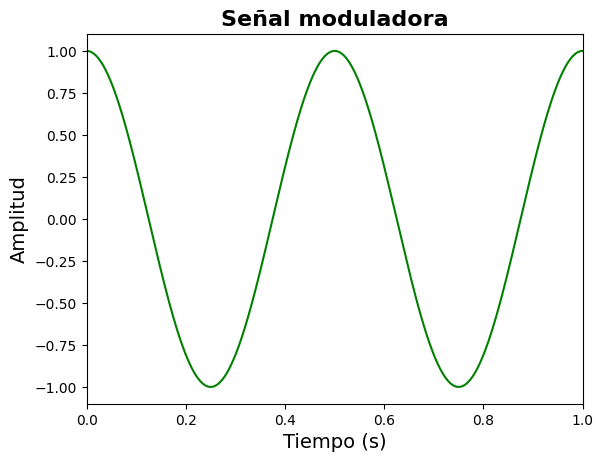

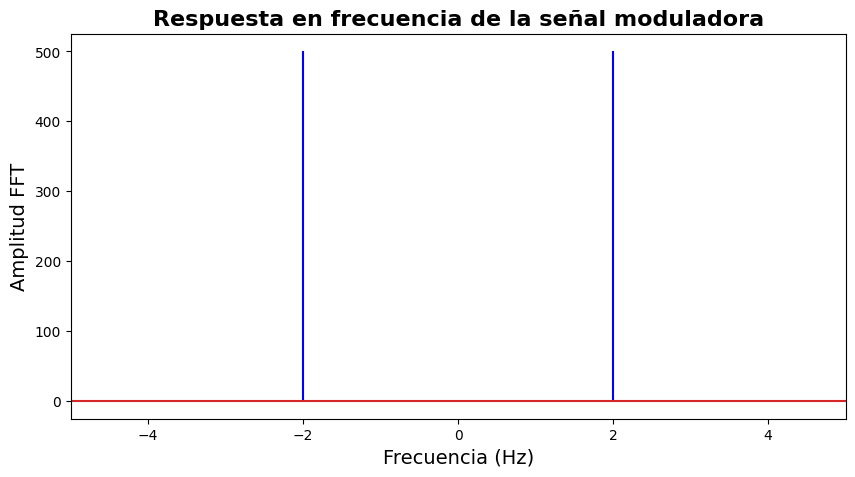

In [ ]:
# Gráfica en el dominio del tiempo de la señal moduladora
plt.plot(t, am, 'g')
plt.xlabel('Tiempo (s)', fontsize='14')  # Etiqueta del eje x
plt.ylabel('Amplitud', fontsize='14')  # Etiqueta del eje y
plt.title("Señal moduladora", fontsize='16', fontweight="bold")  # Título de la gráfica
plt.xlim(0, 1)  # Limitar el eje x de 0 a 1
plt.show()  # Mostrar la gráfica


# Gráfica en el dominio de la frecuencia de la señal moduladora
figura = plt.figure(figsize=(10, 5))
plt.stem(frecuencias, np.abs(transformada_m), linefmt='blue', markerfmt='')  # Eliminar puntos
plt.xlabel('Frecuencia (Hz)', fontsize='14')  # Etiqueta del eje x
plt.ylabel('Amplitud FFT', fontsize='14')  # Etiqueta del eje y
plt.title("Respuesta en frecuencia de la señal moduladora", fontsize='16', fontweight="bold")  # Título de la gráfica
plt.xlim(-5, 5)  # Limitar el eje x de -5 a 5
plt.show()  # Mostrar la gráfica

La primera gráfica muestra la señal moduladora en el *dominio del tiempo*. Se trata de una onda cosenoidal con una frecuencia de 2 Hz y una amplitud de 1. La señal tiene una duración de 1 segundo, ya que el eje x está limitado en el rango de 0 a 1. Esto concuerda con la frecuencia y la amplitud especificadas al momento de definir la señal moduladora.

La segunda gráfica representa la *respuesta en frecuencia* de la señal moduladora, obtenida mediante su transformada de Fourier. En esta gráfica, las amplitudes de las diferentes componentes de frecuencia se muestran en función de la frecuencia. Dado que la señal moduladora es una onda cosenoidal pura, se espera observar un pico en la frecuencia correspondiente a la frecuencia de la señal moduladora, es decir, en 2 Hz. La magnitud en dicho punto debería ser igual a la amplitud de la señal moduladora. En este caso, se ha limitado el eje x de -5 a 5 Hz para visualizar mejor el espectro principal.

#Definición de la señal portadora
Acá se describe la generación de la señal portadora, la cual es una onda sinusoidal con una frecuencia de 30 Hz y una amplitud unitaria.

Posteriormente, se realiza la transformada de Fourier de la señal portadora para analizar su contenido en frecuencia. Dicha transformada es la que nos brinda la magnitud de las componentes de frecuencia presentes en la señal.

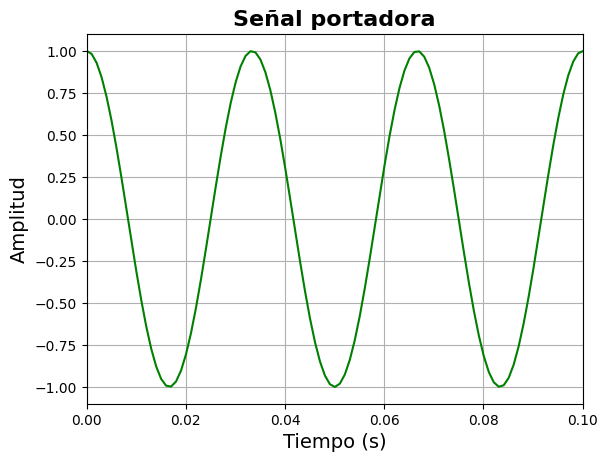

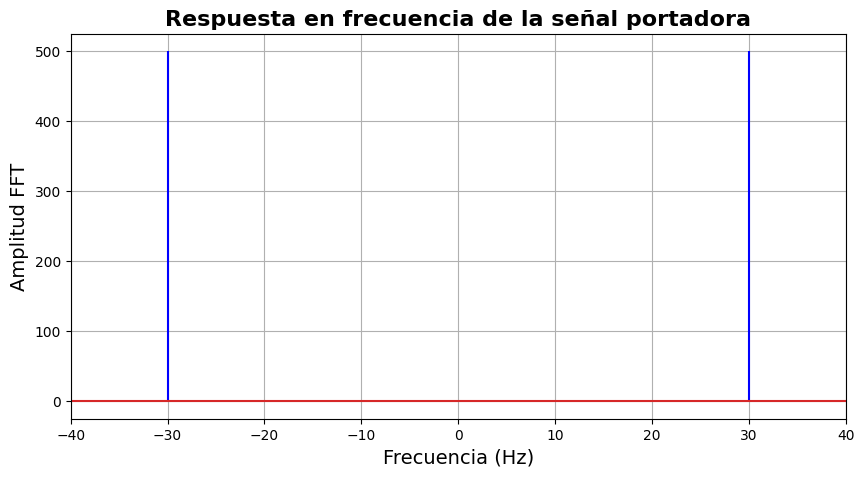

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Definimos un tiempo de muestreo y una frecuencia de muestreo
Ts = 0.0001  # Intervalo de tiempo de muestreo
fs = 1 / Ts  # Frecuencia de muestreo

# Señal portadora
t = np.linspace(0, 1, 1000)  # Vector de tiempo
f_c = 30  # Frecuencia de la señal portadora (Hz)
w_c = 2 * np.pi * f_c  # Frecuencia angular de la señal portadora (rad/s)
A_c = 1  # Amplitud de la señal portadora
ct = A_c * np.cos(w_c * t)  # Señal portadora

# Gráfica en el dominio del tiempo de la señal portadora
plt.plot(t, ct, 'g')
plt.xlabel('Tiempo (s)', fontsize='14')  # Etiqueta del eje x
plt.ylabel('Amplitud', fontsize='14')  # Etiqueta del eje y
plt.title("Señal portadora", fontsize='16', fontweight="bold")  # Título de la gráfica
plt.xlim(0, 0.1)  # Limitar el eje x de 0 a 0.1
plt.grid(True)
plt.show()  # Mostrar la gráfica

# Transformada de Fourier de la señal portadora
transformada_c = fft(ct)  # Transformada de Fourier de la señal portadora
transformada_c[transformada_c < 20] = 0  # Eliminar componentes de frecuencia con magnitud menor a 20
frecuencias = fftfreq(len(ct), longitud_intervalo)  # Frecuencias correspondientes


# Gráfica en el dominio de la frecuencia de la señal portadora
figura = plt.figure(figsize=(10, 5))
plt.stem(frecuencias, np.abs(transformada_c), linefmt='blue', markerfmt='')  # Eliminar puntos
plt.xlabel('Frecuencia (Hz)', fontsize='14')  # Etiqueta del eje x
plt.ylabel('Amplitud FFT', fontsize='14')  # Etiqueta del eje y
plt.title("Respuesta en frecuencia de la señal portadora", fontsize='16', fontweight="bold")  # Título de la gráfica
plt.xlim(-40, 40)  # Limitar el eje x de -40 a 40 para mejor visualización
plt.grid(True)
plt.show()  # Mostrar la gráfica


En el dominio del tiempo, la gráfica muestra esta señal portadora con una duración limitada de 0 a 0.1 segundos, como se especifica con el rango del eje x. Se observa una onda con una frecuencia de 30 Hz y una amplitud de 1.

En el caso de la gráfica en el dominio de la frecuencia, se muestran las amplitudes correspondientes. Dado que la señal portadora es una onda sinusoidal pura, se espera ver un pico en la frecuencia de la señal portadora, es decir, en 30 Hz. En este caso, hemos limitado el eje x de -40 a 40 Hz para visualizar mejor el pico principal y cualquier contenido de frecuencia adicional. Además, se ha añadido una cuadrícula a la gráfica para una mejor visualización.

#Definición de función para la modulación DSC_LC
La función modulacion_DSC_LC realiza la modulación DSC-LC (Double Sideband Suppressed Carrier - Lower Carrier). Toma como entrada la señal de mensaje mt, la señal portadora ct y el factor de modulación ka.
Luego, aplica la modulación DSC-LC a la señal de mensaje utilizando la señal portadora y el factor de modulación dados. La señal modulada resultante se devuelve como salida.

In [ ]:
def modulacion_DSC_LC(mt, ct, ka):
    """
    Función para realizar la modulación DSC-LC (Double Sideband Suppressed Carrier - Lower Carrier).

    Parámetros:
        mt: array-like
            Señal de mensaje.
        ct: array-like
            Señal portadora.
        ka: float
            Factor de modulación.

    Devuelve:
        st: array-like
            Señal modulada DSC-LC.
    """
    # Aplicar la modulación DSC-LC
    st = mt * ka * ct + ct

    return st

#Creación de la señal modulada
En este bloque de código se realizan los siguientes pasos:

* Crea un vector de tiempo n_modulada para la señal modulada.
* Define un factor de modulación ka = 1.5.
* Aplica la modulación DSC-LC a la señal de mensaje (am) y a la señal portadora (ct) utilizando el factor de modulación definido, generando así la señal modulada st_modulada.
* Calcula la transformada de Hilbert de la señal modulada para obtener las envolventes superior e inferior (envelope0_modulada y envelope1_modulada, respectivamente).
* Calcula la transformada de Fourier de la señal modulada (transformada_modulada), eliminando los componentes de frecuencia con magnitud menor a 20.
* Obtiene las frecuencias correspondientes a la transformada de Fourier (frecuencias_modulada).

In [ ]:
# Señal modulada
n_modulada = np.linspace(0, 1, 1000)  # Creación de un vector de tiempo para la señal modulada

# Definir factor de modulación
ka = 1.5

# Aplicar modulación DSC-LC
st_modulada = modulacion_DSC_LC(am, ct, ka)  # Aplicación de la modulación DSC-LC a la señal de mensaje y portadora

# Obtención de la transformada de Hilbert t
hilbert_x_modulada = hilbert(st_modulada)  # Aplicación de la transformada de Hilbert a la señal modulada
envelope0_modulada = np.abs(hilbert_x_modulada)  # Cálculo de la envolvente superior
envelope1_modulada = -np.abs(hilbert_x_modulada)  # Cálculo de la envolvente inferior

# Transformada de Fourier de la señal modulada
transformada_modulada = fft(st_modulada)  # Transformada de Fourier de la señal modulada
N_modulada = len(st_modulada)  # Longitud de la señal modulada
n_modulada = np.arange(N_modulada)  # Vector de índices de la señal modulada
transformada_modulada[transformada_modulada < 20] = 0  # Eliminar componentes de frecuencia con magnitud menor a 20
frecuencias_modulada = fftfreq(len(st_modulada), 1/1000)  # Frecuencias correspondientes a la transformada

#Gráficas de los resultados de la señal modulada

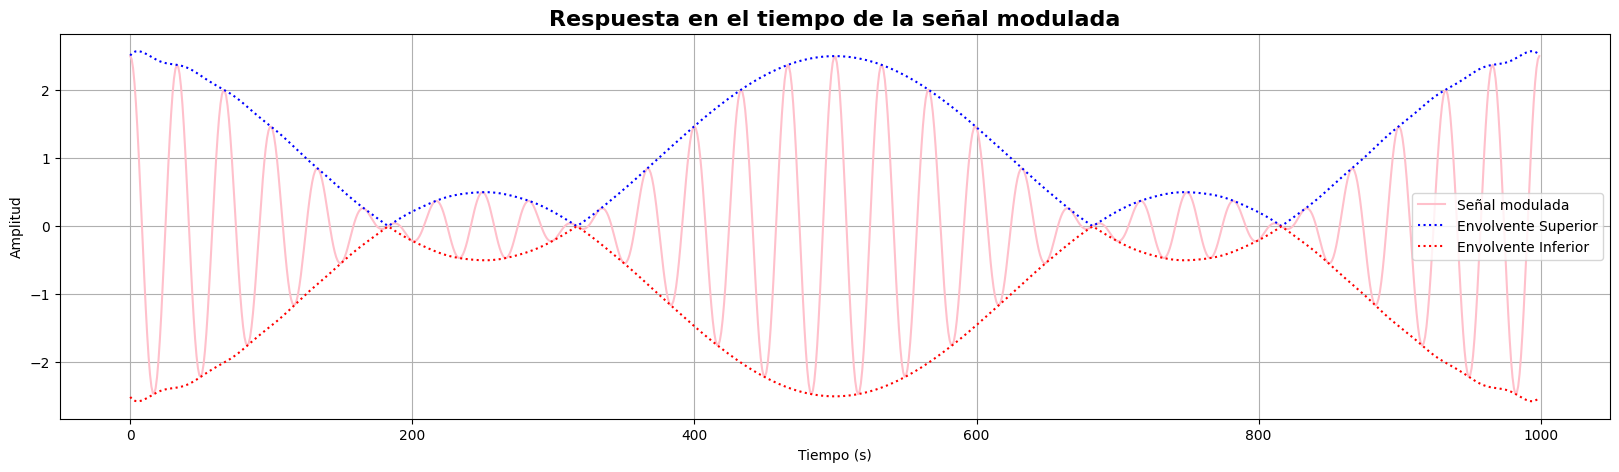

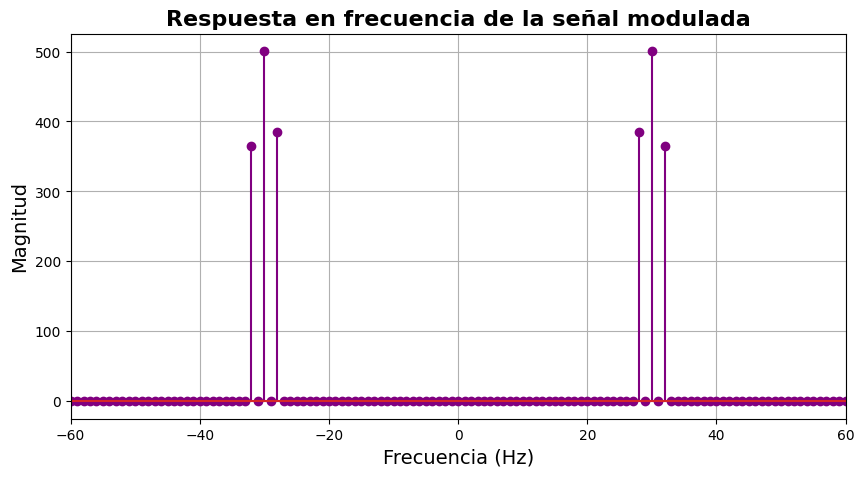

In [ ]:
# Plot de los resultados

# Gráfica en el dominio del tiempo de la señal modulada
fig_modulada, ax_modulada = plt.subplots()  # Creación de la figura y ejes para la gráfica
ax_modulada.plot(n_modulada, st_modulada, label='Señal modulada', color="pink")  # Graficar la señal modulada
ax_modulada.plot(n_modulada, envelope0_modulada, "b:", label='Envolvente Superior')  # Graficar la envolvente superior
ax_modulada.plot(n_modulada, envelope1_modulada, "r:", label='Envolvente Inferior')  # Graficar la envolvente inferior
ax_modulada.set_xlabel('Tiempo (s)')  # Etiqueta del eje x
ax_modulada.set_ylabel('Amplitud')  # Etiqueta del eje y
ax_modulada.legend()  # Mostrar leyenda
fig_modulada.set_size_inches(20, 5)  # Establecer tamaño de la figura
plt.title("Respuesta en el tiempo de la señal modulada", fontsize='16', fontweight="bold")  # Título de la gráfica
plt.grid(True)  # Habilitar cuadrícula en la gráfica
plt.show()  # Mostrar la gráfica


# Gráfica en el dominio de la frecuencia de la señal modulada
figura_modulada = plt.figure(figsize=(10, 5))  # Creación de la figura
plt.stem(frecuencias_modulada, np.abs(transformada_modulada), linefmt='purple', markerfmt='o')  # Graficar la transformada de Fourier
plt.xlabel('Frecuencia (Hz)', fontsize='14')  # Etiqueta del eje x
plt.ylabel('Magnitud', fontsize='14')  # Etiqueta del eje y
plt.xlim(-60, 60)  # Límites del eje x para una mejor visualización
plt.title("Respuesta en frecuencia de la señal modulada", fontsize='16', fontweight="bold")  # Título de la gráfica
plt.grid(True)  # Habilitar cuadrícula en la gráfica
plt.show()  # Mostrar la gráfica

Como resultados de esta parte se tiene que el código que se realizó fue sumamente similar a los anteriores, de modo que lo que generó más cambió fue la función de modulación, en la cual fue necesario incluir la ecuación necesaria que caracteriza este tipo de modulación.

Además, se notó que en este caso las amplitudes de las señales son importantes para el caso de las gráficas obtenidas. Un gran cambio observable en las gráficas es que al ser del tipo LC los impulsos de la señal portadora se ubican en su frecuencia respectiva igual que al inicio del proceso.

Ya que se debía cumplir con una sobre-modulación se optó por utilizar una señal cosenoidal, la cual cruza por cero, y esto se puede notar con los considerables cambios de fase observados en la señal ya modulada cuando se da cada uno de los cruces en cero.

La señal verse afectada por el factor de modulación con un valor de 1.5, se observa el cambio en los impulsos, los cuales se vieron disminuidos por este factor (500/ka), tal y como se muestra en la gráfica en el dominio de la frecuencia.


#Estudio sobre el efecto del factor de modulación 𝜇 durante el proceso

En esta parte, se desea realizar dicho estudio en particular analizando la señal resultante de la modulación, es decir, la señal modulada. De tal forma que se llegue a la justificación de la obtención de un valor para dicho factor que corrija de manera óptima el efecto de la sobre-modulación.


Para realizar esto se analizarán distintas gráficas, iniciando por ver cómo se ven afectadas por el valor de la amplitud de la señal moduladora, es decir, Am. Seguidamente se analizará para distintos valores de Ka. Para una simplificación del proceso se realizaron dos funciones, una para el cálculo de la modulación, la cual recibe los parámetros necesarios, y otra para realizar las gráficas correspondientes.

In [ ]:
def calcular_modulacion(KA_in, AM_in, AC_in):
    """
    Función para calcular la modulación DSC-LC, las envolventes y la transformada de Fourier de la señal modulada.

    Parámetros:
        KA_in:
            Factor de modulación.
        AM_in:
            Amplitud de la señal moduladora.
        AC_in:
            Amplitud de la señal portadora.

    Devuelve:
        n: Vector de tiempo.
        st: Señal modulada DSC-LC.
        envelope0:
            Envolvente superior.
        envelope1:
            Envolvente inferior.
        transformada_modulada:
            Transformada de Fourier de la señal modulada.
        freq:
            Frecuencias correspondientes a la transformada.
    """
    n = np.linspace(0, 1, 1000)
    fc = 30  # Frecuencia de la señal de portadora o moduladora (Hertz)
    wc = 2 * np.pi * fc  # Frecuencia angular de la señal portadora (radianes)
    Ac = AC_in  # Amplitud de portadora
    ct = Ac * np.cos(wc * n)

    fm = 2  # Frecuencia de la señal de tono (Hertz)
    wm = 2 * np.pi * fm  # Frecuencia angular de la señal de tono (radianes)
    Am = AM_in  # Amplitud de tono
    mt = Am * np.cos(wm * n)  # Señal de tono

    st = mt * KA_in * ct + ct  # Fórmula de salida

    # Perform the Herbert transform using the Hilbert transform
    hilbert_x = hilbert(st)
    envelope0 = np.abs(hilbert_x)
    envelope1 = -np.abs(hilbert_x)

    # Transformada de Fourier de la señal modulada
    X = fft(st)
    X[X < 20] = 0
    freq = fftfreq(len(st), 1/1000)

    return n, st, envelope0, envelope1, X, freq

def graficar_modulacion(n, st, envelope0, envelope1, transformada_modulada, freq, KA_in, AM_in, AC_in):
    """
    Función para graficar la señal modulada DSC-LC, sus envolventes y su transformada de Fourier.

    Parámetros:
        n:
            Vector de tiempo.
        st:
            Señal modulada DSC-LC.
        envelope0:
            Envolvente superior.
        envelope1:
            Envolvente inferior.
        transformada_modulada:
            Transformada de Fourier de la señal modulada.
        freq:
            Frecuencias correspondientes a la transformada.
        KA_in:
            Factor de modulación.
        AM_in:
            Amplitud de la señal moduladora.
        AC_in:
            Amplitud de la señal portadora.
    """
    # Gráfico de la señal modulada en el dominio del tiempo con envolventes
    fig, ax = plt.subplots()
    ax.plot(n, st, label='Señal modulada', color="g")
    ax.plot(n, envelope0, "b:", label='Envolvente superior')
    ax.plot(n, envelope1, "r:", label='Envolvente inferior')
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Amplitud')
    ax.legend()
    ax.set_title(f"Respuesta en el tiempo con: ka={KA_in}, Am={AM_in}, Ac={AC_in}",
                 fontsize='16', fontweight="bold")
    fig.set_size_inches(15, 5)
    plt.grid(True)
    plt.show()

    # Gráfico de la transformada de Fourier de la señal modulada
    fig, ax = plt.subplots()
    ax.stem(freq, np.abs(transformada_modulada), linefmt='purple', markerfmt='o')
    ax.set_xlabel('Frecuencia (Hz)')
    ax.set_ylabel('Magnitud')
    ax.set_title(f"Respuesta en frecuencia con: k_a={KA_in}, Am={AM_in}, Ac={AC_in}",
                 fontsize='16', fontweight="bold")
    ax.set_xlim(-40, 40)
    plt.grid(True)
    plt.show()

#Variando el valor de Am
Utilizando las funciones creadas anteriormente se realizarán 3 pruebas con distintos valores de Am para poder analizar sus variaciones cuando μ>1, μ=1, μ<1.

-----------------------------------------------------------
Resultados utilizando μ>1


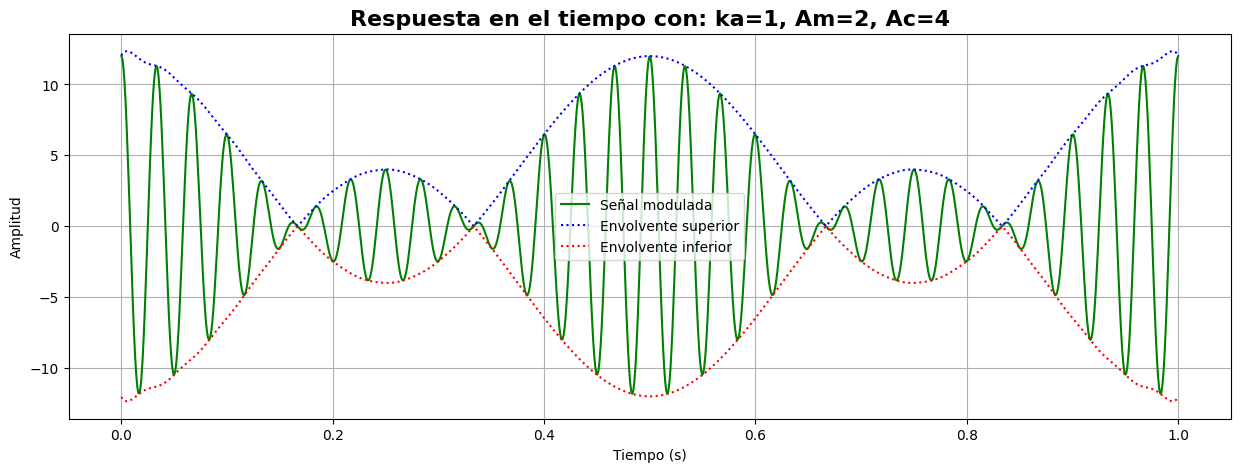

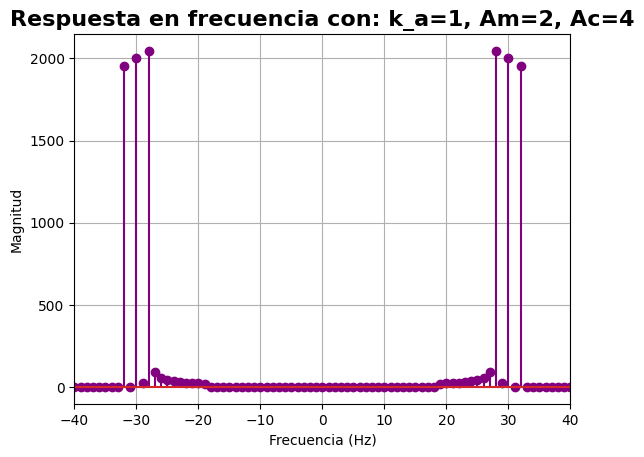

-----------------------------------------------------------

Resultados utilizando μ=1


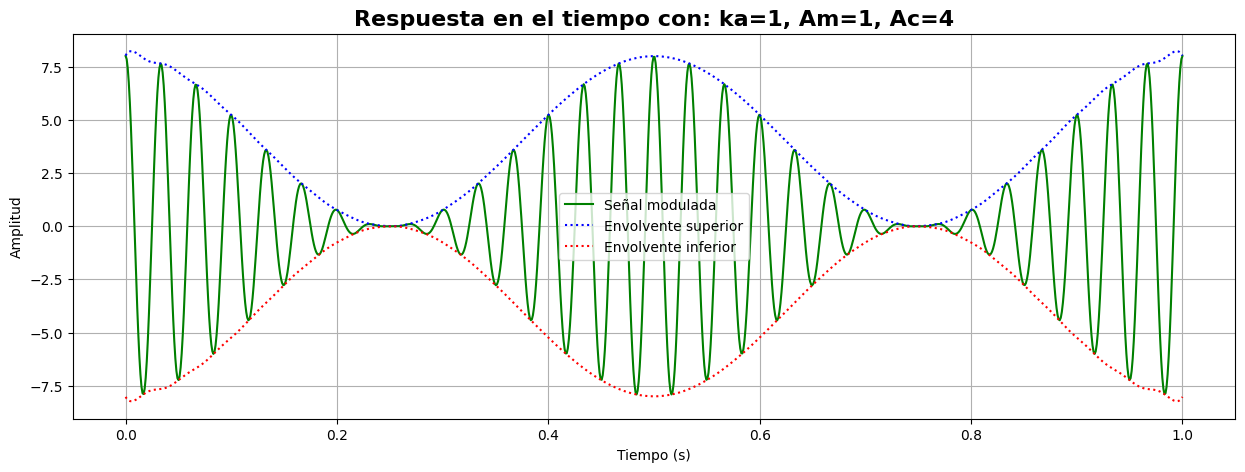

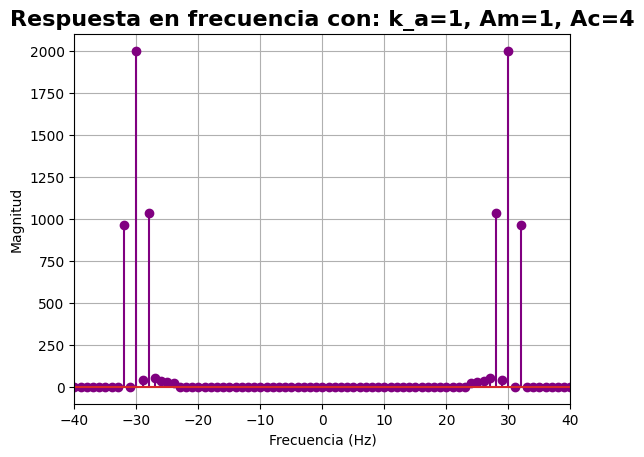

-----------------------------------------------------------

Resultados utilizando μ<1


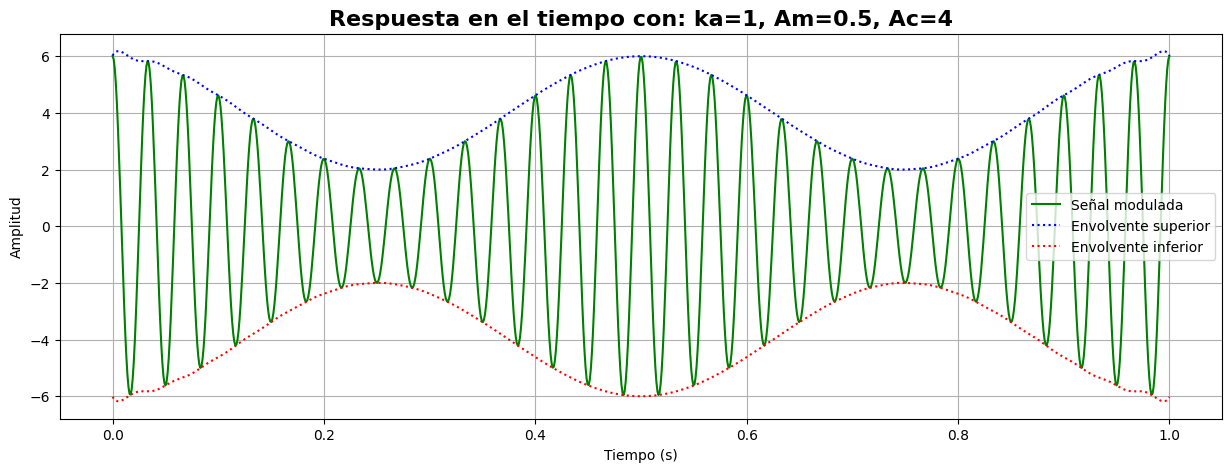

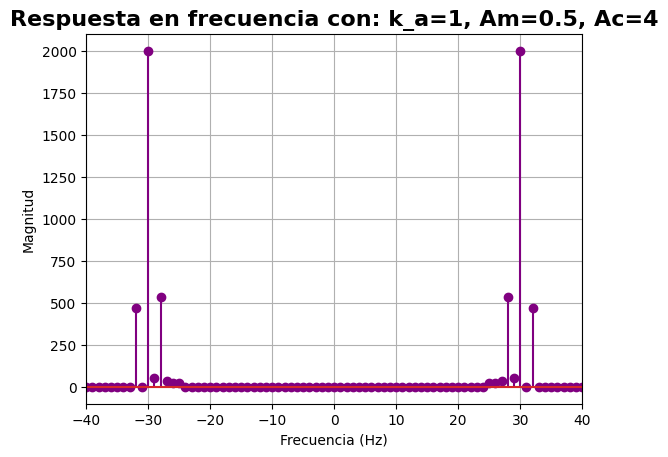

-----------------------------------------------------------


In [ ]:
# Pruebas
print("-----------------------------------------------------------")
print("Resultados utilizando μ>1")
n, st, envelope0, envelope1, transformada_modulada, freq = calcular_modulacion(1, 2, 4)
graficar_modulacion(n, st, envelope0, envelope1, transformada_modulada, freq, 1, 2, 4)
print("-----------------------------------------------------------")
print("")

print("Resultados utilizando μ=1")
n, st, envelope0, envelope1, transformada_modulada, freq = calcular_modulacion(1, 1, 4)
graficar_modulacion(n, st, envelope0, envelope1, transformada_modulada, freq, 1, 1, 4)
print("-----------------------------------------------------------")
print("")

print("Resultados utilizando μ<1")
n, st, envelope0, envelope1, transformada_modulada, freq = calcular_modulacion(1, 0.5, 4)
graficar_modulacion(n, st, envelope0, envelope1, transformada_modulada, freq, 1, 0.5, 4)
print("-----------------------------------------------------------")

#Variando el valor de k_a
Utilizando las mismas funciones creadas:


-----------------------------------------------------------
Resultados utilizando μ>1


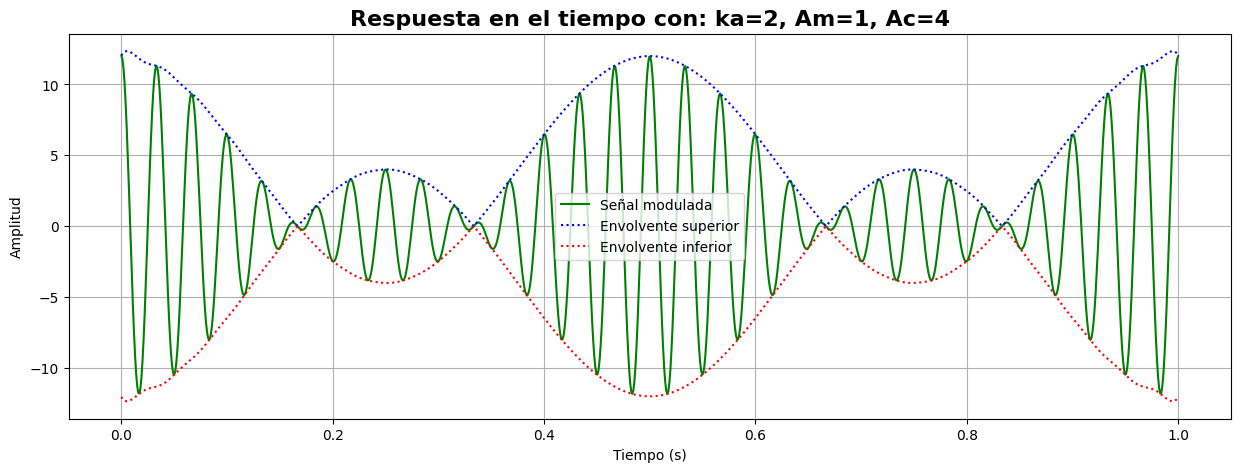

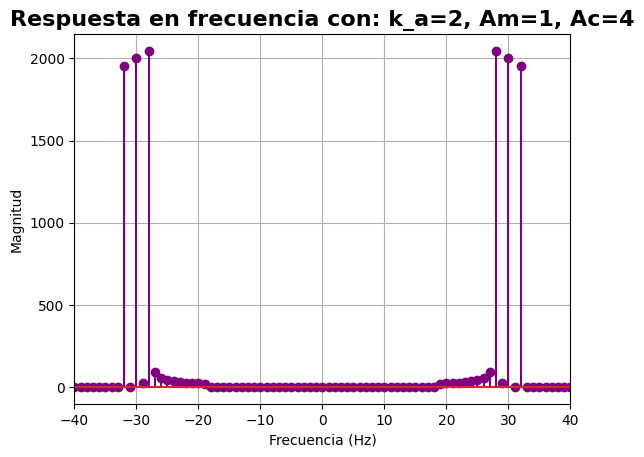

-----------------------------------------------------------

Resultados utilizando μ=1


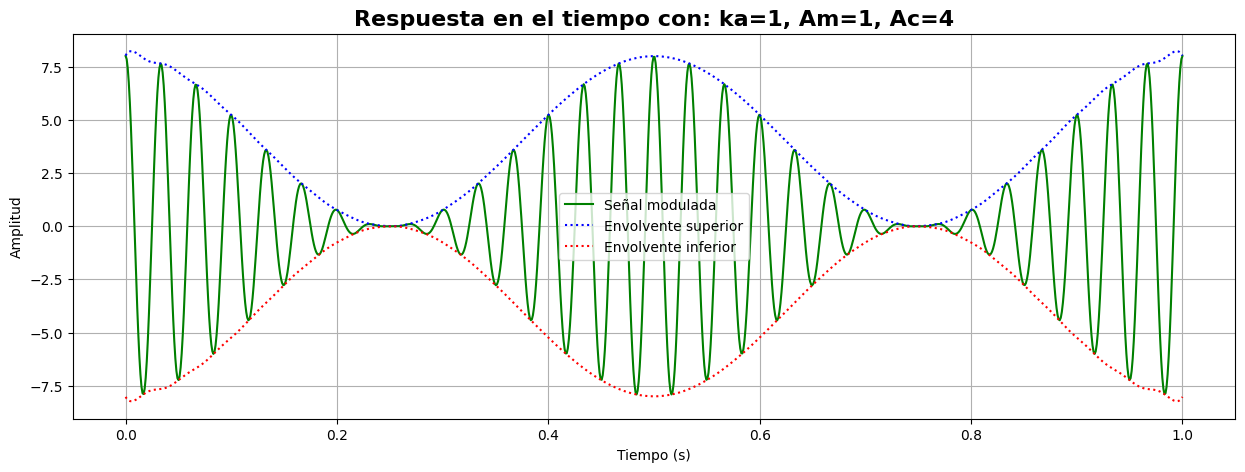

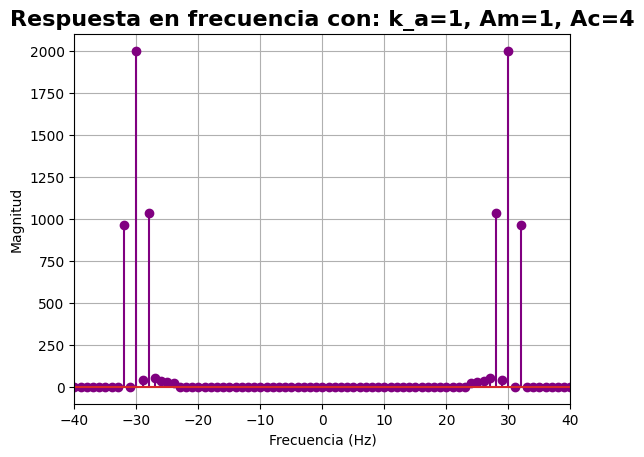

-----------------------------------------------------------

Resultados utilizando μ<1


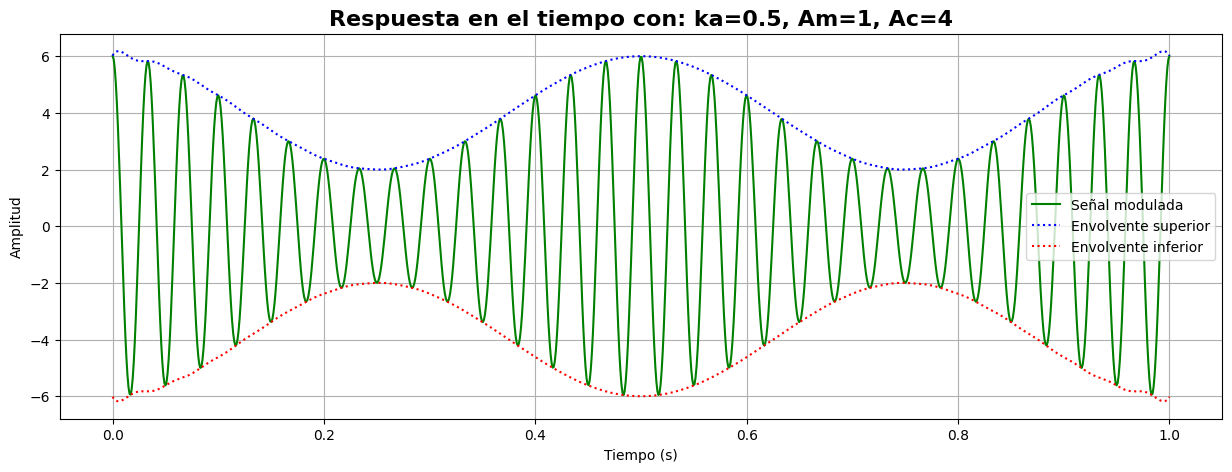

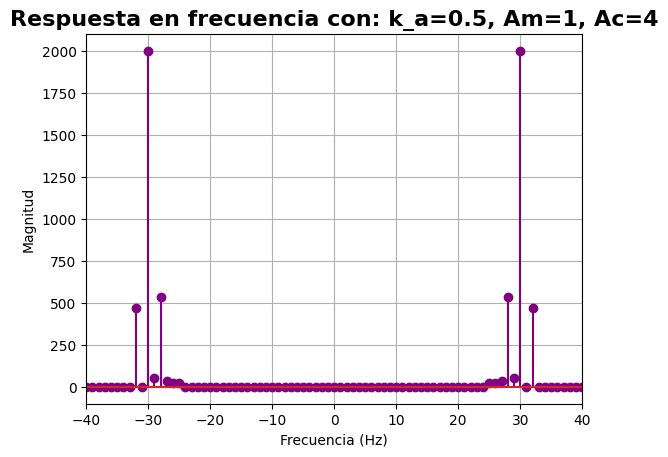

-----------------------------------------------------------


In [ ]:
#Resultados
print("-----------------------------------------------------------")
print("Resultados utilizando μ>1")
n, st, envelope0, envelope1, transformada_modulada, freq = calcular_modulacion(2, 1, 4)
graficar_modulacion(n, st, envelope0, envelope1, transformada_modulada, freq, 2, 1, 4)
print("-----------------------------------------------------------")
print("")

print("Resultados utilizando μ=1")
n, st, envelope0, envelope1, transformada_modulada, freq = calcular_modulacion(1, 1, 4)
graficar_modulacion(n, st, envelope0, envelope1, transformada_modulada, freq, 1, 1, 4)
print("-----------------------------------------------------------")
print("")

print("Resultados utilizando μ<1")
n, st, envelope0, envelope1, transformada_modulada, freq = calcular_modulacion(0.5, 1, 4)
graficar_modulacion(n, st, envelope0, envelope1, transformada_modulada, freq, 0.5, 1, 4)
print("-----------------------------------------------------------")

#Análisis de los resultados

Realizando un análisis de lo observado en las gráficas obtenidas al variar el valor de Ka y Am, se tienen los siguientes 3 casos que se consideran fundamentales de explicar:

1. Sobre-modulación (μ > 1): Se observa una sobre-modulación con múltiples cruces por el eje x de las envolventes, lo que indica un exceso en la modulación, lo que resulta en distorsión de la señal. Esto nos comprueba que lo visto en clases efectivamente sucede.

2. Modulación con μ = 1: Se obtiene un único cruce por el eje x, observable en la gráfica del dominio del tiempo, lo que sugiere una modulación casi adecuada donde la señal modulada conserva en gran parte las características de la señal original, sin embargo, lo deseado es que no se tenga ningún cambio de fase para las envolventes, así estas se mantienen sin cruzar por cero.

3. Modulación adecuada (μ < 1): Se evidencia una atenuación de la señal, sin embargo, las envolventes no cruzan por cero y su menor amplitud corresponde a la misma de la señal moduladora, por lo cual se cumple con lo estudiado, ya que se había visto que μ debe ser menor a 1 para evitar distorsión en la envolvente (sobre-modulación).

Además, en cuanto a las pruebas realizadas, es importante destacar que al final las variaciones de Ka y Am dieron los mismos resultados, aunque el valor de uno se intercambiara por el otro. Por tanto, lo importante es identificar que se cumpla con una modulación adecuada, de forma que dichos factores generen un producto menor a 1.

Sin embargo, se debe contemplar que, tanto la variación del factor de modulación como de la amplitud de la señal moduladora, pueden influir en la calidad de la señal modulada y la facilidad de su detección en el receptor. Por ello, es importante ajustar estos parámetros con cuidado para garantizar una modulación efectiva sin introducir distorsiones.

# Determinación del valor de 𝜇 para corregir de manera óptima el efecto de la sobre-modulación

Según lo obtenido en el análisis anterior, el valor adecuado de 𝜇 consiste en aquel que dado el producto de Ka y Am se mantenga menor a uno, en este caso se opta por elegir el caso en el que $K_a = 0.5$, ya que con este valor las envolventes se mantienen por encima de cero, es decir, no ocurre la sobre modulación y la atenuación de la señal portadora no se ve tan afectada.

Es decir, lo ideal para elegir un valor adecuado del factor de modulación consiste en analizar qué tanta atenuación se le da a la señal y, lo más importante, verificar que el resultado no de una sobre modulación, en la que se pierda parte del mensaje inicial.

Valor correcto para corregir el efecto de sobre-modulación: μ<1


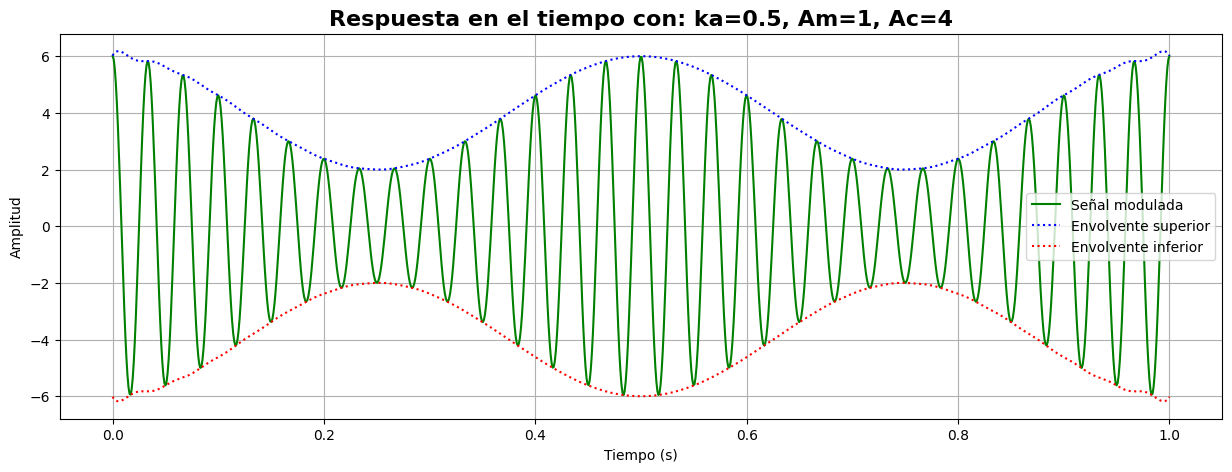

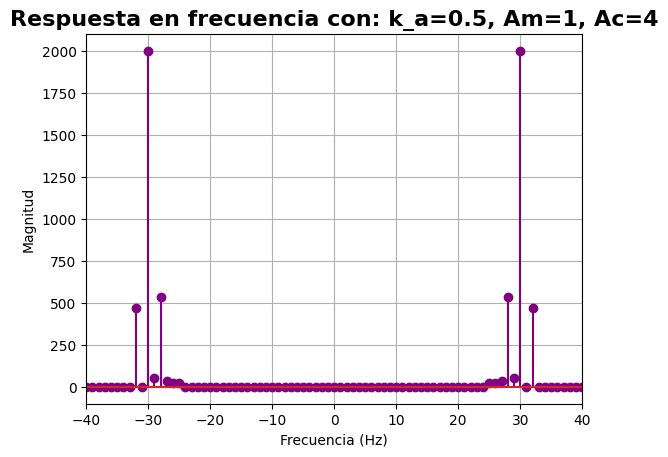

-----------------------------------------------------------


In [ ]:
print("Valor correcto para corregir el efecto de sobre-modulación: μ<1")
n, st, envelope0, envelope1, transformada_modulada, freq = calcular_modulacion(0.5, 1, 4)
graficar_modulacion(n, st, envelope0, envelope1, transformada_modulada, freq, 0.5, 1, 4)
print("-----------------------------------------------------------")

# Actividad #4: Modulación SSB y VSB

1. Investigue el funcionamiento y principio de las modulaciones, SSB y VSB, destacando todos los principios de operación.

**Solución**

# Modulación de Banda Lateral Única (SSB)
De acuerdo con [1], la modulación SSB se caracteriza por ser similar a la modulación DSC, sin embargo, en esta solamente se utiliza una de las bandas, pues para transmitir un mensaje basta con una de ellas. Es por esta razón que la modulación SSB tiene la característica de ser más eficiente a la hora de transmitir información.

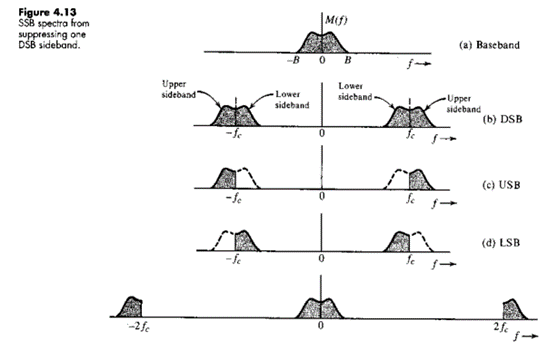


Como se muestra en la figura, ya sea la LSB (banda lateral inferior) o la USB (banda lateral superior) pueden ser suprimidas de la señal DSB mediante un filtro pasa banda. Este esquema, en el cual solo una banda lateral es transmitida, se conoce como transmisión de banda lateral única (SSB, por sus siglas en inglés), y requiere solo la mitad del ancho de banda de la señal DSB.
Como se menciona en [1], una señal SSB puede ser demodulada coherente (sincrónicamente) al igual que las señales DSB-SC. Por ejemplo, la multiplicación de una señal USB (Figura c) por $cos (w_c * t)$ desplaza su espectro hacia la izquierda y la derecha por $w_c$, produciendo el espectro mostrado en la figura e.

Además, el filtrado pasa bajo de esta señal produce la señal de banda base deseada. El caso es similar con las señales LSB.  Por lo tanto, los transmisores utilizan solo la mitad del ancho de banda de la señal DSB-SC sin costo adicional, puesto que la demodulación de las señales SSB es igual a la de las DSB-SC.
También, se tiene que, ya que no hay un portador adicional que acompañe a la señal SSB modulada, las salidas del modulador resultantes se conocen como señales de portadora suprimida (SSB-SC).

En este tipo de modulación, se utilizan 3 métodos principales para generar las señales SSB: cambio de fase, filtrado selectivo y el método de Weaver. Sin embargo, ninguno es perfecto y todos requieren que el espectro de la señal de banda base tenga poca potencia cerca del origen.
* El método de cambio de fase utiliza una fase retrasada para ciertos componentes espectrales.
* El filtrado selectivo consiste en pasar una señal DSB-SC a través de un filtro de corte para eliminar una de las bandas laterales no deseadas.
* El método de Weaver utiliza dos etapas de modulación de amplitud SSB para ampliar la brecha entre las bandas laterales.

El método más común es el filtrado selectivo y usa filtros para eliminar la banda lateral no deseada, pero requiere una separación entre la banda de paso y la banda de rechazo. En el caso de  las señales de voz tienen esta separación naturalmente, así que facilitan su filtrado.
Por otro lado, el método de Weaver es útil cuando la relación entre la brecha y la frecuencia de la portadora es pequeña. Utiliza 2 etapas de modulación para ampliar la brecha y permitir una modulación SSB eficaz a frecuencias de portadora más altas.
Principio de Operación:

* En la modulación SSB, se elimina una de las dos bandas laterales (superior o inferior) generadas por la modulación de amplitud (AM).
*	La portadora y una sola banda lateral (ya sea la superior o la inferior) se transmiten.
*	Esto se logra mediante el uso de filtros que eliminan una de las bandas laterales y parte de la portadora.
*	Esto reduce significativamente el ancho de banda necesario para la transmisión, lo que es útil en aplicaciones de radio.
*	La demodulación SSB requiere un circuito especializado para recuperar la señal original.
# Aplicaciones: #

*	Comunicaciones de radio de alta frecuencia (HF), como transmisiones de radio de onda corta y comunicaciones marítimas.
*	Radiocomunicaciones militares y aeronáuticas.

# Modulación de Banda Lateral Residual (VSB):
Según [1], la modulación de amplitud con banda lateral vestigial (VSB) es una técnica que encuentra un equilibrio entre la modulación de doble banda lateral (DSB) y la de banda lateral única (SSB).

A diferencia de SSB, donde se rechaza una banda lateral completa, en VSB se permite un corte gradual de una banda lateral. Esto facilita la generación de señales VSB y su ancho de banda es solo ligeramente mayor que el de las señales SSB. En este tipo de modulación, la señal de banda base se puede recuperar exactamente mediante un detector síncrono junto con un filtro ecualizador apropiado en el receptor. También es posible recuperar la señal de banda base utilizando un detector de envolvente si se transmite una portadora grande junto con la señal VSB.

Este método es bastante útil, ya que es difícil generar señales SSB exactas. Para ello se suele requiere que la señal de mensaje m(t) tenga un nulo alrededor de dc. Por lo tanto, un cambiador de fase, necesario en el método de cambio de fase, es irrealizable, o solo aproximadamente realizable. Aunque la generación de señales DSB es mucho más simple, pero requiere el doble del ancho de banda de la señal.

# Principio de Operación:
*	La VSB es una variante de la modulación SSB.
*	En la VSB, se utiliza un filtro para eliminar una pequeña parte de la banda lateral que no contiene información relevante.
*	De esta forma, se reduce la cantidad de ancho de banda utilizado para la transmisión de la señal.
*	La portadora y la banda lateral residual (con información importante) se transmiten.

# Aplicaciones:
*	Televisión abierta (broadcast TV): La VSB se utiliza para transmitir señales de televisión en sistemas de transmisión de televisión analógica. Este tipo de modulación ha sido particularmente importante en la transición de la televisión analógica a la televisión digital.
*	Transmisiones de radio AM: En algunos casos, la VSB se utiliza para reducir el ancho de banda de las señales de radio AM.

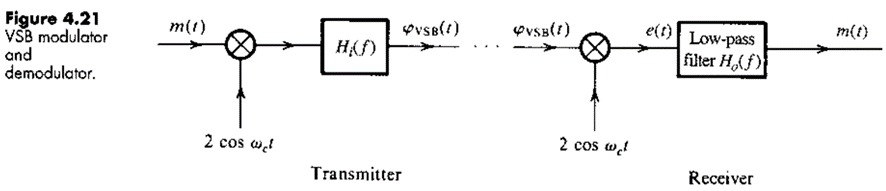


2. Investigue de manera clara y puntual, con ejemplos, en que consiste la Transformada de Hilbert y su aplicación en el marco de la modulación SSB.

#Transformada de Hilbert
Esta es una operación matemática que se utiliza comúnmente en el procesamiento de señales para obtener la componente de "baja frecuencia" de una señal. Esta transformada es particularmente útil en el contexto de la modulación de banda lateral única (SSB), donde se utiliza para eliminar una de las bandas laterales de la señal modulada, lo que permite una transmisión más eficiente y un uso más efectivo del ancho de banda.

La Transformada de Hilbert de una señal toma la señal en el dominio del tiempo y la convierte en una señal compleja en el dominio de la frecuencia. La parte real de esta señal compleja es la señal original, mientras que la parte imaginaria representa la "envolvente" de la señal original, es decir, la amplitud de la señal sin la componente de frecuencia de base. Esto es útil para eliminar una de las bandas laterales de una señal SSB.

# Generación de SSB usando la Transformada de Hilbert:
*	La Transformada de Hilbert se utiliza para generar la versión compleja de la señal modulada.
*	Se retiene solo la parte real de esta señal compleja (que contiene la información de fase) para una de las bandas laterales, mientras que la otra se descarta.
*	Esto permite una modulación SSB eficaz y precisa, eliminando la necesidad de circuitos complejos de generación de SSB.

En términos matemáticos, la transformada de una señal x(t), está dada por:


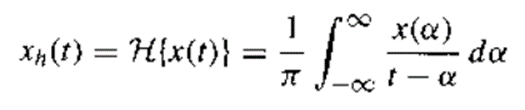

#Ejemplo

Como ejemplo, se tiene la siguiente figura, tomada de [1]:
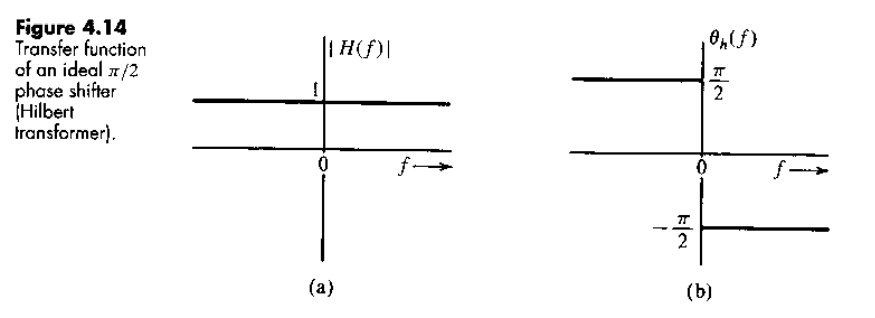



Según lo estudiado en el libro se tiene que |H(f)| = 1 y que φ(f) = -π/2 para f > 0 y φ(f) = π/2 para f < 0, como se muestra en la Figura.

Por lo tanto, si se realiza un cambio en la fase de cada componente de m(t) por π/2 (sin cambiar su amplitud), la señal resultante es mp(t), la transformada de Hilbert de m(t).

Por lo tanto, un transformador de Hilbert es un *cambiador de fase ideal* que desplaza la fase de cada componente espectral por -π/2.



**Referencias**

[1] B. P. Lathi, Modern Digital and Analog Communication Systems, 3rd Edition






#Punto 4.3
3. Para el caso del SSB, construya de manera similar a la usada en las actividades 1, 2, y 3, un sistema SSB incluyendo modulador y demodulador.

**Solución**

Para resolver este punto, se utilizó como base el ejemplo mostrado en el libro [], en el cual obtienen la odulación y demodulacón de una señal cosenoidal.

#Definición de Parámetros

Entonces el primer paso para resolver este punto es definir la frecuencia y la amplitud de la señal portadora y la moduladora, así como la frecuencia de muestreo y el vector de tiempo.

In [ ]:
# Parámetros de la señal
AmSSB = 1         # Amplitud de la señal moduladora
AcSSB = 1         # Amplitud de la señal portadora
fmSSB = 10        # Frecuencia de la señal moduladora
fcSSB = 100        # Frecuencia de la señal portadora
fsSSB = 20000      # Frecuencia de muestreo

# Tiempo
tSSB = np.arange(0, 0.5, 1/fsSSB)
# Genera un vector de tiempo que va desde 0 hasta 0.5 segundos,
# con una frecuencia de muestreo de fs puntos por segundo.

#Definición de las funciones de modulación, demodulación y graficación

In [ ]:
def modulador (AmSSB, AcSSB, fmSSB, fcSSB):
  """
  Funcionalidad: realiza la modulción de una señal (obtiene un equivalente en alta frecuencia)
  Entradas: AmSSB: amplitud de la señal moduladora, AcSSB: amplitud de la señal portadora
  fmSSB: frecuencia de la señal moduladora y fcSSB: frecuencia de la señal portadora
  Salida: mSSB: señal moduladora, cSSB: señal portadora, sb: señal modulada
  """

  # Señal moduladora
  # Genera la señal moduladora 'm' que es una onda coseno con frecuencia 'fm'.
  # Se multiplica por 'Am' para ajustar su amplitud.
  mSSB = AmSSB * np.cos(2 * np.pi * fmSSB * tSSB)

  # Señal portadora
  # Genera la señal portadora 'c' que es una onda coseno con frecuencia 'fc'.
  # Se multiplica por 'Ac' para ajustar su amplitud.
  cSSB = AcSSB * np.cos(2 * np.pi * fcSSB * tSSB)

  # Señal Single Side Band with Upper Side Band (Señal modulada)
  # Esta ecuación viene de una simplificación al aplicar la transformada de Hilbert
  # a la señal moduladora y multiplicarla por la portadora
  # Se tomó del ejemplo 4.6 del libro "Modern_Digital_And_Analog_Communication"
  sb = np.cos(((2 * np.pi * fcSSB)+(2 * np.pi * fmSSB))* tSSB)

  return mSSB, cSSB, sb

def demoduladorSSB(sb, cSSB):
  # Demodulación por el método sincrónico
  # Cabe destacar que en este caso se multiplicó por 2 la señal pues se
  # hizo con base en el ejemplo del libro "Modern_Digital_And_Analog_Communication"
  # La razón de esto es porque al filtrar la señal al final se reduce su ampltud a
  # la mitad y por lo general se busca recuperar el mensaje lo más cercano posible al original
  """
  Funcionalidad: realiza la demodulción de una señal
  Entradas: sb: señal modulada con el método USB y cSSB: señal portadora para
  el método de modulación SSB
  Salida: em: señal demodulada
  """
  em = sb * 2* cSSB
  return em

def Graficas (tSSB, mSSB, fsSSB, cSSB, sb, em, ySSB):
  """
  Funcionalidad: Calcula las transformadas de fourier de las diferentes señales
  y grafica los resultados en domnio del tiempo y la frecuencia
  Entradas: tSSB: vector de tiempo y mSSB: señal moduladora, fsSSB: frecuencia de
  muestreo definida al inicio, cSSB: señal portadora, sb: señal modulada, em: señal
  demodulada, ySSB: Señal de filtrada de salida
  Salida: em: señal demodulada
  """

  # Transformadas de Fourier
  freqs_mSSB, MSSB = transformada_fourier(mSSB, fsSSB)  # Transformada de Fourier de la señal moduladora
  freqs_cSSB, CSSB = transformada_fourier(cSSB, fsSSB)  # Transformada de Fourier de la señal portadora
  freqs_sb, SB = transformada_fourier(sb, fsSSB)  # Transformada de Fourier de la señal modulada
  freqs_em, EM = transformada_fourier(em, fsSSB)  # Transformada de Fourier de la señal demodulada
  freqs_ySSB, YSSB = transformada_fourier(ySSB, fsSSB)  # Transformada de Fourier de la señal filtrada/resultante


  # Señal Moduladora - Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(tSSB, mSSB, 'b')
  plt.title('Señal Moduladora - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.grid(True)
  plt.show()

  # Señal Moduladora - Dominio de la frecuencia
  plt.figure(figsize=(8, 4))
  plt.plot(freqs_mSSB, MSSB, 'b')
  plt.title('Señal Moduladora - Frecuencia')
  plt.xlabel('Frecuencia [Hz]')
  plt.ylabel('Magnitud')
  plt.grid(True)
  plt.show()

  # Señal Portadora - Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(tSSB, cSSB, 'r')
  plt.title('Señal Portadora - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.grid(True)
  plt.show()

  # Señal Portadora - Dominio de la frecuencia
  plt.figure(figsize=(8, 4))
  plt.plot(freqs_cSSB, CSSB, 'r')
  plt.title('Señal Portadora - Frecuencia')
  plt.xlabel('Frecuencia [Hz]')
  plt.ylabel('Magnitud')
  plt.grid(True)
  plt.show()

  # Señal Modulada - Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(tSSB, sb, 'g')
  plt.title('Señal Modulada - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.grid(True)
  plt.show()

  # Señal Modulada - Dominio de la frecuencia
  plt.figure(figsize=(8, 4))
  plt.plot(freqs_sb, SB, 'g')
  plt.title('Señal Modulada - Frecuencia')
  plt.xlabel('Frecuencia [Hz]')
  plt.ylabel('Magnitud')
  plt.grid(True)
  plt.show()

  # Señal Demodulada - Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(tSSB, em, 'm')
  plt.title('Señal Demodulada - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.grid(True)
  plt.show()

  # Señal Demodulada - Dominio de la frecuencia
  plt.figure(figsize=(8, 4))
  plt.plot(freqs_em, EM, 'm')
  plt.title('Señal Demodulada - Frecuencia')
  plt.xlabel('Frecuencia [Hz]')
  plt.ylabel('Magnitud')
  plt.grid(True)
  plt.show()

  # Señal Filtrada Final - Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(tSSB, ySSB, 'c')
  plt.title('Señal Final Filtrada - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.grid(True)
  plt.show()

  # Señal Filtrada Final - Dominio de la frecuencia
  plt.figure(figsize=(8, 4))
  plt.plot(freqs_ySSB, YSSB, 'c')
  plt.title('Señal Final Filtrada - Frecuencia')
  plt.xlabel('Frecuencia [Hz]')
  plt.ylabel('Magnitud')
  plt.grid(True)
  plt.show()

  # Gráficas comparativas - Dominio del tiempo
  plt.figure(figsize=(8, 4))
  plt.plot(tSSB, mSSB, label='Señal moduladora')
  plt.plot(tSSB, ySSB, label='Señal de salida')
  plt.title('Comparación Señal Moduladora y de Salida - Tiempo')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Amplitud')
  plt.legend()
  plt.grid(True)
  plt.show()
  return

#Principal

En esta sección se llaman a las funciones de modular, demodular, se filtra la señal de salida y se llama a la función de graficar.

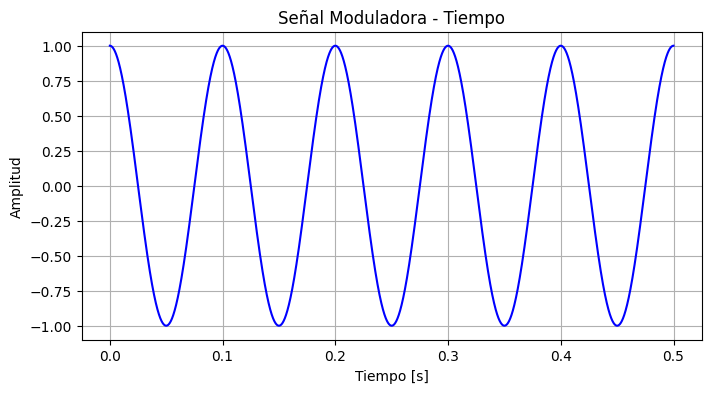

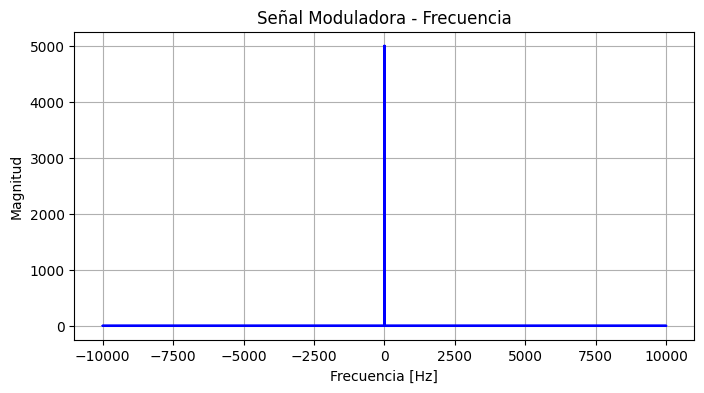

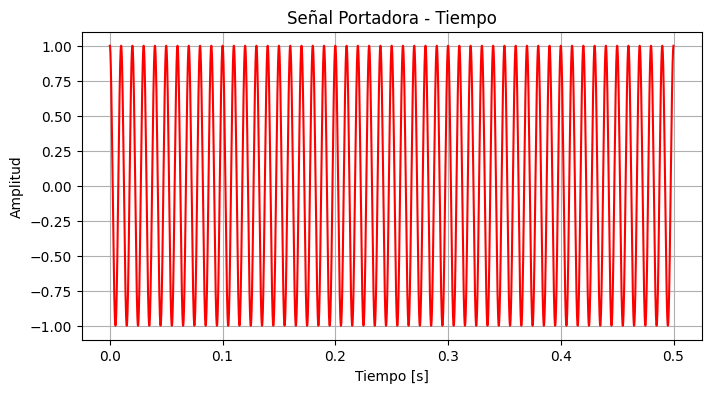

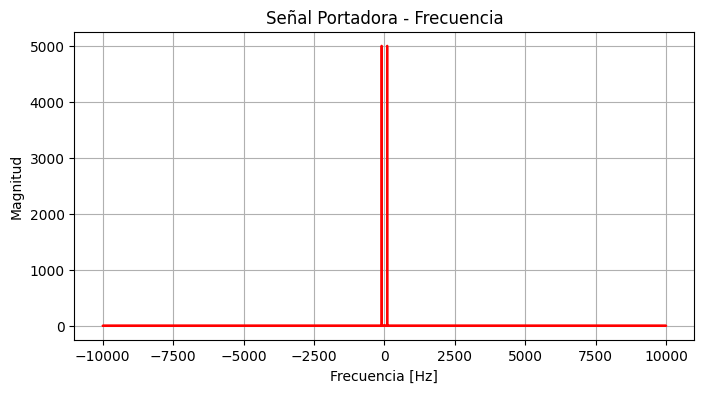

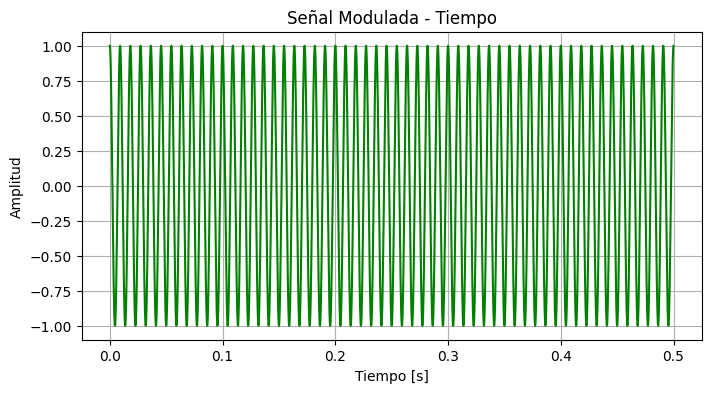

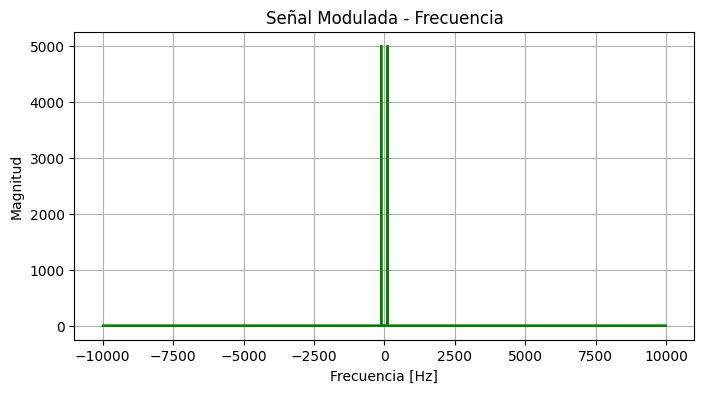

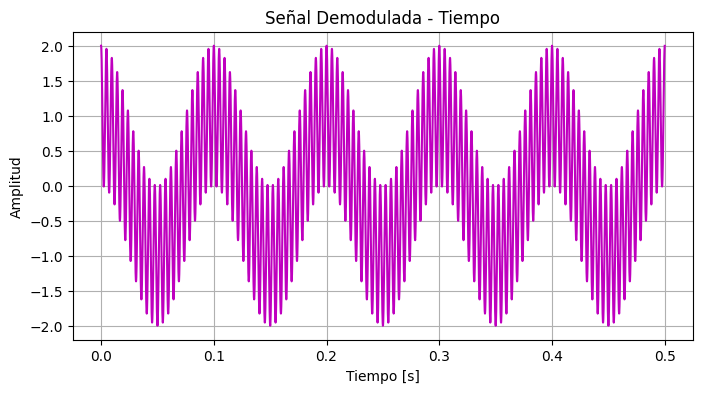

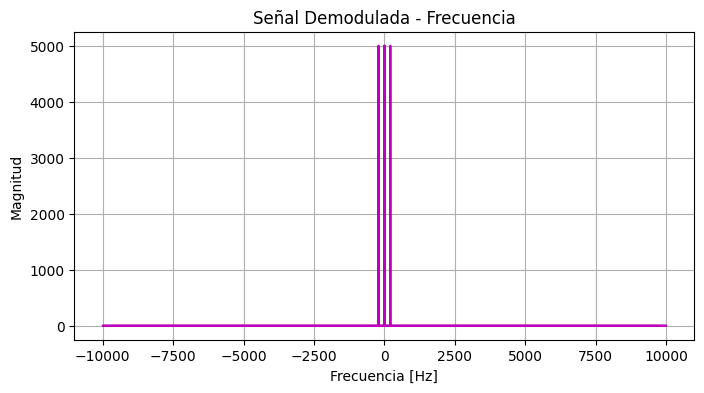

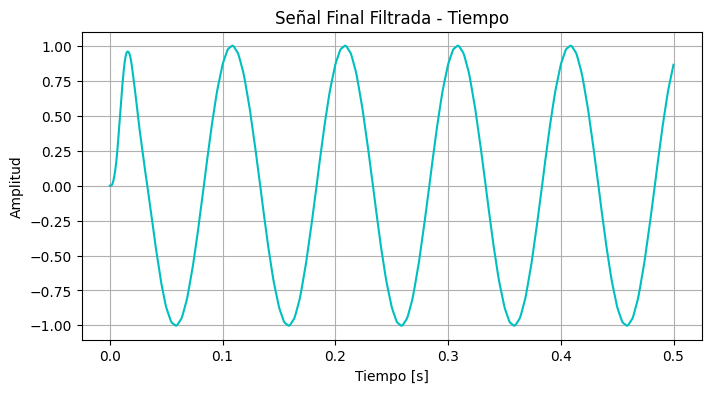

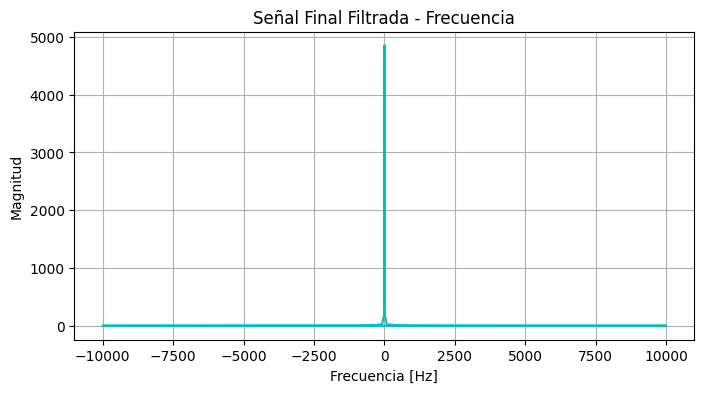

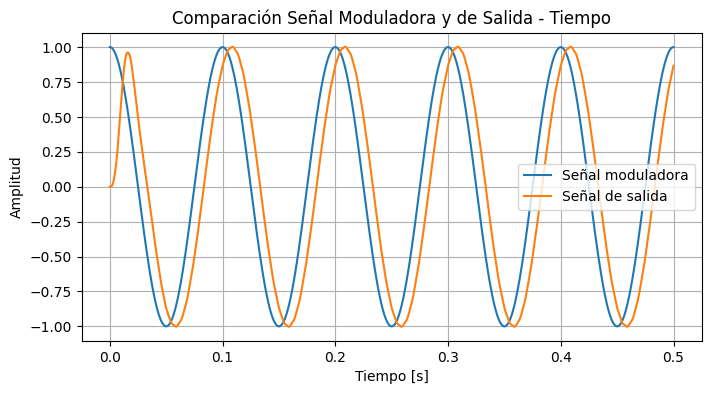

In [ ]:

mSSB, cSSB, sb = modulador (AmSSB, AcSSB, fmSSB, fcSSB)
em = demoduladorSSB(sb, cSSB)
#dem = np.abs(hilbert(em))

# Filtro pasa bajos
cutoff = fmSSB*5  # Frecuencia de corte igual a la frecuencia moduladora
order = 4        # Orden del filtro

# Aplicar el filtro
ySSB = butter_lowpass_filter(em, cutoff, fsSSB, order)

# Se grafican los resultados
Graficas (tSSB, mSSB, fsSSB, cSSB, sb, em, ySSB)


# Análisis de los resultados

En este caso se puede notar que la señal obtenida después de la modulación es prácticamente la misma que la orginal, solo que con un leve desfase, el cual está relacionado al filtrado de la señal demodulada. Esto se confirmó porque si se modficaban los valores del filtro, el desfase y la forma en general de la señal se perturbaba más. Además, se puede notar que no hubo pérdidas de amplitud, lo cual se debe a que en el proceso de demodulación se contenpló esta pérdida y se amplificó la señal demodulada por un factor de 2. La razón por la que se hizo de esta forma es porque como se mencionó anteriormente, esta parte de la tarea se resolvió tomando como guía el ejemplo del libro recomendado del curso [1].